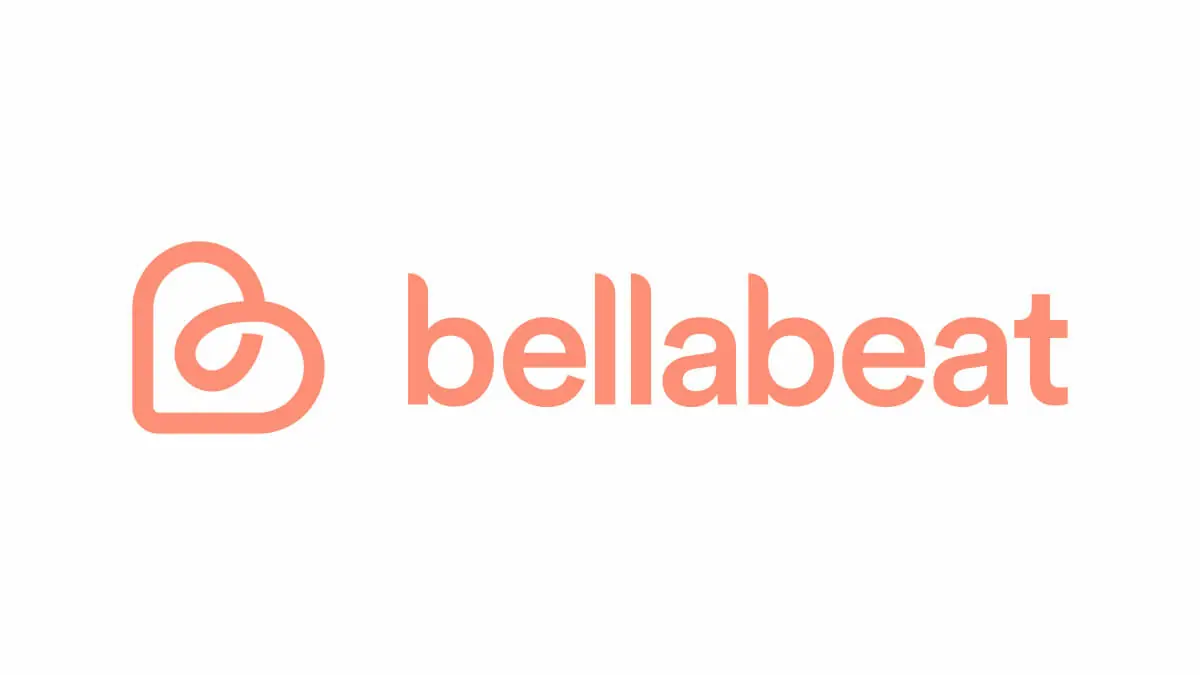



# Bellabeat 
## How Can a Wellness Technology Company Play It Smart?
This is a case study for Bellabeat using a subset of customers data.  

# Data Background 
In the scenario the data is internal, produced by 35 individuals using one Wellness Technology product.
The sample size is not large enough to eliminate bias, but it would provide an idea of where to look for trends in a larger population.

[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes
information about daily activity, steps, and heart rate that can be used to explore users’ habits.
#### Correct number of participates in total is 35.

# Data Integrity
In the scenario the data is internal, produced by 35 individuals using one smart application. 
The data is too large to analyze without coding, especially the narrow data, which are too voluminous for an Excel file. 
The data for dtm (date time) is inconsistently formatted along with the names of the various date columns then, the csv files when read had the date columns converted to chr. 

The data is too large to analyze without coding, especially the narrow data, which are too voluminous for an Excel file. The data is inconsistently formatted and names date columns, and the CSV files, when read, had the date columns converted to chr. The data is not structured well enough to combine the segmented 2 months and then join together the different metrics recorded.
Due to the limitations of Rstudio Cloud and Kaggle, we are only analyzing the daily activity, heart rate, weight, sleep, and METs. The data also requires outside information to provide context for the metrics and guide the analysis.

# Business Goal 

Identify trends in smart device usage that can be applied to Bellabeat customers to influence Bellabeat's marketing strategy.




# Setting Up Environment 

Loading packages and librarying them to run.

In [2]:
install.packages("readr")
install.packages("tidyverse")
install.packages("hms")
install.packages("tidyr")
library(dplyr)
library(readr)
library(ggplot2)
library(hms)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘readr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installi

In [3]:
# Construct path
my_path <- file.path("/kaggle", "working")

# Set the working directory to the path
setwd(my_path)

# Check the working directory again
getwd()

# Construct paths
path_1 <- "/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv"
path_2 <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv"

path_3 <- "/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv"
path_4 <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv"

path_5 <- "/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv"
path_6 <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv"

path_7 <- "/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv"
path_8 <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv"

path_9 <- "/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv"
path_10 <- "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv"

# Read csv files
data_3_daily_activity <- read_csv(path_1)
data_2_daily_activity <- read_csv(path_2)

data_1_heartrate <- read_csv(path_3)
data_2_heartrate <- read_csv(path_4)

data_1_weight <- read_csv(path_5)
data_2_weight <- read_csv(path_6)

data_1_sleep <- read_csv(path_7)
data_2_sleep <- read_csv(path_8)

data_1_METs <- read_csv(path_9)
data_2_METs <- read_csv(path_10)


[1] "/kaggle/working"

Rows: 457 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1154681 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column 

In [4]:
# Check the count of individuals before combining datasets
cat("Check the count of individuals before combining datasets\n") 
cat("Daily Activity:\n") 
n_distinct(data_3_daily_activity$Id)
n_distinct(data_2_daily_activity$Id)

cat("Heart Rate:\n") 
n_distinct(data_1_heartrate$Id)
n_distinct(data_2_heartrate$Id)

cat("Weight:\n") 
n_distinct(data_1_weight$Id)
n_distinct(data_2_weight$Id)

cat("Sleep:\n") 
n_distinct(data_1_sleep$Id)
n_distinct(data_2_sleep$Id)

cat("METs:\n") 
n_distinct(data_1_METs$Id)
n_distinct(data_2_METs$Id)

Check the count of individuals before combining datasets
Daily Activity:


[1] 35

[1] 33

Heart Rate:


[1] 14

[1] 14

Weight:


[1] 11

[1] 8

Sleep:


[1] 23

[1] 24

METs:


[1] 34

[1] 33

# Data Cleaning: 
## Checking Integerity of New Data Frames and Learning About Their Structures 

NAs are a commonly occurring error in the dataset when adjusting. 
Here, we learned that the weight data frame began with NAs in the Fat column before trying to correct any data type issues with the data frame.
The date is seen as data type chr in all the data frames instead of date or dtm. This will create an issue when manipulating the date or attempting to combine it.

In [5]:
# Inspect the format of date columns to identify any anomalies
head(unique(data_3_daily_activity$ActivityDate))
head(unique(data_2_daily_activity$ActivityDate))

# Additionally, let's check for any NAs in the data
colSums(is.na(data_3_daily_activity))
colSums(is.na(data_2_daily_activity))


# Inspect the format of date columns to identify any anomalies
head(unique(data_1_heartrate$Time))
head(unique(data_2_heartrate$Time))

# Additionally, let's check for any NAs in the data
colSums(is.na(data_1_heartrate))
colSums(is.na(data_2_heartrate))


# Check the range of values in each column 
summary(data_1_weight$Id)

# Inspect the format of date columns to identify any anomalies
head(unique(data_1_weight$Date))
head(unique(data_2_weight$Date))

# Additionally, let's check for any NAs in the data
colSums(is.na(data_1_weight))
colSums(is.na(data_2_weight))


# Inspect the format of date columns to identify any anomalies
head(unique(data_1_sleep$date))
head(unique(data_2_sleep$date))

# Additionally, let's check for any NAs in the data
colSums(is.na(data_1_sleep))
colSums(is.na(data_2_sleep))


# Inspect the format of date columns to identify any anomalies
head(unique(data_1_METs$ActivityMinute))
head(unique(data_2_METs$ActivityMinute))

# Additionally, let's check for any NAs in the data
colSums(is.na(data_1_METs))
colSums(is.na(data_2_METs))


[1] "3/25/2016" "3/26/2016" "3/27/2016" "3/28/2016" "3/29/2016" "3/30/2016"

[1] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" "4/16/2016" "4/17/2016"

Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

Id             ActivityDate               TotalSteps 
                       0                        0                        0 
           TotalDistance          TrackerDistance LoggedActivitiesDistance 
                       0                        0                        0 
      VeryActiveDistance ModeratelyActiveDistance      LightActiveDistance 
                       0                        0                        0 
 SedentaryActiveDistance        VeryActiveMinutes      FairlyActiveMinutes 
                       0                        0                        0 
    LightlyActiveMinutes         SedentaryMinutes                 Calories 
                       0                        0                        0

[1] "4/1/2016 7:54:00 AM" "4/1/2016 7:54:05 AM" "4/1/2016 7:54:10 AM"
[4] "4/1/2016 7:54:15 AM" "4/1/2016 7:54:20 AM" "4/1/2016 7:54:25 AM"

[1] "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM"
[4] "4/12/2016 7:21:20 AM" "4/12/2016 7:21:25 AM" "4/12/2016 7:22:05 AM"

Id  Time Value 
    0     0     0

Id  Time Value 
    0     0     0

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
1.504e+09 4.703e+09 6.962e+09 6.477e+09 8.878e+09 8.878e+09 

[1] "4/5/2016 11:59:59 PM"  "4/10/2016 6:33:26 PM"  "4/3/2016 11:59:59 PM" 
[4] "4/6/2016 11:59:59 PM"  "4/7/2016 11:59:59 PM"  "3/30/2016 11:59:59 PM"

[1] "5/2/2016 11:59:59 PM"  "5/3/2016 11:59:59 PM"  "4/13/2016 1:08:52 AM" 
[4] "4/21/2016 11:59:59 PM" "5/12/2016 11:59:59 PM" "4/17/2016 11:59:59 PM"

Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             31 
           BMI IsManualReport          LogId 
             0              0              0

Id           Date       WeightKg   WeightPounds            Fat 
             0              0              0              0             65 
           BMI IsManualReport          LogId 
             0              0              0

[1] "3/13/2016 2:39:30 AM" "3/13/2016 2:40:30 AM" "3/13/2016 2:41:30 AM"
[4] "3/13/2016 2:42:30 AM" "3/13/2016 2:43:30 AM" "3/13/2016 2:44:30 AM"

[1] "4/12/2016 2:47:30 AM" "4/12/2016 2:48:30 AM" "4/12/2016 2:49:30 AM"
[4] "4/12/2016 2:50:30 AM" "4/12/2016 2:51:30 AM" "4/12/2016 2:52:30 AM"

Id  date value logId 
    0     0     0     0

Id  date value logId 
    0     0     0     0

[1] "3/12/2016 12:00:00 AM" "3/12/2016 12:01:00 AM" "3/12/2016 12:02:00 AM"
[4] "3/12/2016 12:03:00 AM" "3/12/2016 12:04:00 AM" "3/12/2016 12:05:00 AM"

[1] "4/12/2016 12:00:00 AM" "4/12/2016 12:01:00 AM" "4/12/2016 12:02:00 AM"
[4] "4/12/2016 12:03:00 AM" "4/12/2016 12:04:00 AM" "4/12/2016 12:05:00 AM"

Id ActivityMinute           METs 
             0              0              0

Id ActivityMinute           METs 
             0              0              0

# Data Cleaning & Wrangling
## Sorting 
After many approaches, I found an accurate way to convert the different date columns to date types without losing the necessary data. The simple as.Date() per date column did not work.

The next five chunks of code will:
  1. Copy the respective date column.
  2. Cast the date column as date or dtm (date time) while commonly naming the new column “Date”. 
  3. Then drop the original date column incorrectly stored as chr (to avoid possible errors combining/joining data frames).
  4. Next, the data is sorted by the new "Date" column, then "Id" column (because the Ids repeat, but the dates are unique when associated with the Id). 
  5. Simultaneously, we will summarize the data in each row to one row for date and id.   
  6. Check the structure of the data frames for accurate change and errors.
  7. Finally, the data from March 2016 is union using an rbind() with its equivalent data frame for April 2016.
  8. Rename columns with ambiguous names when combined with all the data. 
  9. Check the structure and preview of the data frames, looking for correct changes to data type, column name, and NAs errors. 


# Data Cleaning & Wrangling: Daily Activity

In [6]:
# Daily Activity is already summarized by day, the steps taken are slightly different but yield the same results.

# Copy ActivityDate column to Date type for daily activity data frames
data_3_daily_activity$Date <- as.Date(data_3_daily_activity$ActivityDate, format = "%m/%d/%Y")
data_2_daily_activity$Date <- as.Date(data_2_daily_activity$ActivityDate, format = "%m/%d/%Y")

# Check the structure of the dataframes
# str(data_3_daily_activity)
# str(data_2_daily_activity)

# Group data_3_daily_activity by Date and Id
dailyact3 <- group_by(data_3_daily_activity, Date, Id)

# Group data_2_daily_activity by Date and Id
dailyact2 <- group_by(data_2_daily_activity, Date, Id)

# Remove the ActivityDate column
dailyact3 <- mutate(dailyact3, ActivityDate = NULL)
dailyact2 <- mutate(dailyact2, ActivityDate = NULL)

# Check the structure of the dataframes after removing ActivityDate
# str(dailyact3)
# str(dailyact2)
# Print a note

cat("Daily Activity 3:\n") 
head (dailyact3)

# Print a note
cat("Daily Activity 2:\n") 
head (dailyact2)

# Check the number of columns in each dataframe
ncol_data_3 <- ncol(dailyact3)
ncol_data_2 <- ncol(dailyact2)

# Make sure the number of columns match
if (ncol_data_3 != ncol_data_2) {
  stop("Number of columns in data_3_daily_activity and data_2_daily_activity do not match.")
}

# Unioning the two tables for daily activity, unions stack on top of another verse joins, which connect from the sides on a common column
# Combine data_3_daily_activity and data_2_daily_activity using rbind
dailyactivity <- rbind(dailyact3, dailyact2)

# Check the structure of the combined data frame
# str(dailyactivity)

# Print a note
cat("Daily Activity:\n") 
# Check the formatting of the data frames
head(dailyactivity)

# Check the type of the Id column
# typeof(dailyactivity$Id)
# class(dailyactivity$Id)    


# Print a note
cat("Count of Individuals in Daily Activity:\n") 
                               
# Check the count of Ids in data frame, should be 35 (weight1 = 35 , weight2 = 8)
length(unique(dailyactivity$Id))

# Print a note
cat("Individual's Ids in Daily Activiy:\n")    

# Get unique Ids and their counts
print(da_unique_ids <- table(dailyactivity$Id))

Daily Activity 3:


Id         TotalSteps TotalDistance TrackerDistance LoggedActivitiesDistance
1 1503960366 11004       7.11          7.11           0                       
2 1503960366 17609      11.55         11.55           0                       
3 1503960366 12736       8.53          8.53           0                       
4 1503960366 13231       8.93          8.93           0                       
5 1503960366 12041       7.85          7.85           0                       
6 1503960366 10970       7.16          7.16           0                       
  VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
1 2.57               0.46                     4.07               
2 6.92               0.73                     3.91               
3 4.66               0.16                     3.71               
4 3.19               0.79                     4.95               
5 2.16               1.09                     4.61               
6 2.36               0.51                     4.29               
  SedentaryActiveDistance VeryActiveMinutes FairlyActiveMinutes
1 0                       33                12                 
2 0                       89                17                 
3 0                       56                 5                 
4 0                       39                20                 
5 0                       28                28                 
6 0                       30                13                 
  LightlyActiveMinutes SedentaryMinutes Calories Date      
1 205                   804             1819     2016-03-25
2 274                   588             2154     2016-03-26
3 268                   605             1944     2016-03-27
4 224                  1080             1932     2016-03-28
5 243                   763             1886     2016-03-29
6 223                  1174             1820     2016-03-30

Daily Activity 2:


Id         TotalSteps TotalDistance TrackerDistance LoggedActivitiesDistance
1 1503960366 13162      8.50          8.50            0                       
2 1503960366 10735      6.97          6.97            0                       
3 1503960366 10460      6.74          6.74            0                       
4 1503960366  9762      6.28          6.28            0                       
5 1503960366 12669      8.16          8.16            0                       
6 1503960366  9705      6.48          6.48            0                       
  VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
1 1.88               0.55                     6.06               
2 1.57               0.69                     4.71               
3 2.44               0.40                     3.91               
4 2.14               1.26                     2.83               
5 2.71               0.41                     5.04               
6 3.19               0.78                     2.51               
  SedentaryActiveDistance VeryActiveMinutes FairlyActiveMinutes
1 0                       25                13                 
2 0                       21                19                 
3 0                       30                11                 
4 0                       29                34                 
5 0                       36                10                 
6 0                       38                20                 
  LightlyActiveMinutes SedentaryMinutes Calories Date      
1 328                   728             1985     2016-04-12
2 217                   776             1797     2016-04-13
3 181                  1218             1776     2016-04-14
4 209                   726             1745     2016-04-15
5 221                   773             1863     2016-04-16
6 164                   539             1728     2016-04-17

Daily Activity:


Id         TotalSteps TotalDistance TrackerDistance LoggedActivitiesDistance
1 1503960366 11004       7.11          7.11           0                       
2 1503960366 17609      11.55         11.55           0                       
3 1503960366 12736       8.53          8.53           0                       
4 1503960366 13231       8.93          8.93           0                       
5 1503960366 12041       7.85          7.85           0                       
6 1503960366 10970       7.16          7.16           0                       
  VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
1 2.57               0.46                     4.07               
2 6.92               0.73                     3.91               
3 4.66               0.16                     3.71               
4 3.19               0.79                     4.95               
5 2.16               1.09                     4.61               
6 2.36               0.51                     4.29               
  SedentaryActiveDistance VeryActiveMinutes FairlyActiveMinutes
1 0                       33                12                 
2 0                       89                17                 
3 0                       56                 5                 
4 0                       39                20                 
5 0                       28                28                 
6 0                       30                13                 
  LightlyActiveMinutes SedentaryMinutes Calories Date      
1 205                   804             1819     2016-03-25
2 274                   588             2154     2016-03-26
3 268                   605             1944     2016-03-27
4 224                  1080             1932     2016-03-28
5 243                   763             1886     2016-03-29
6 223                  1174             1820     2016-03-30

Count of Individuals in Daily Activity:


[1] 35

Individual's Ids in Daily Activiy:

1503960366 1624580081 1644430081 1844505072 1927972279 2022484408 2026352035 
        50         50         40         43         43         43         43 
2320127002 2347167796 2873212765 2891001357 3372868164 3977333714 4020332650 
        43         33         43          8         30         42         63 
4057192912 4319703577 4388161847 4445114986 4558609924 4702921684 5553957443 
        36         43         39         46         43         46         43 
5577150313 6117666160 6290855005 6391747486 6775888955 6962181067 7007744171 
        41         38         39          9         35         45         38 
7086361926 8053475328 8253242879 8378563200 8583815059 8792009665 8877689391 
        43         42         31         43         39         41         43 


# Data Cleaning & Wrangling: Heart rate

In [7]:
# Copy Time column to Date type for heart rate data frames
data_1_heartrate$Date <- as.Date(data_1_heartrate$Time, format = "%m/%d/%Y %H:%M:%S") 
data_2_heartrate$Date <- as.Date(data_2_heartrate$Time, format = "%m/%d/%Y %H:%M:%S") 

# Check the structure of the data frames
# str(data_1_heartrate)
# str(data_2_heartrate)


# Summarize data_1_heartrate by Date and Id, retaining all grouping levels, dropping Time column
heartrate1 <- data_1_heartrate %>%
              group_by(Date, Id) %>%
              summarise(across(-Time, ~ if(is.numeric(.)) mean(., na.rm = TRUE) else first(.)), .groups = "drop")

# Summarize data_2_heartrate by Date and Id, retaining all grouping levels, dropping Time column
heartrate2 <- data_2_heartrate %>%
              group_by(Date, Id) %>%
              summarise(across(-Time, ~ if(is.numeric(.)) mean(., na.rm = TRUE) else first(.)), .groups = "drop")


# Check the formatting of the data frames
# Put a note
cat("Heart Rate 1:\n")
head(heartrate1)

#Put a note
cat("Heart Rate 2:\n")                               
head(heartrate2)
        
# Check the number of columns in each data frame
ncol_data_4 <- ncol(data_1_heartrate)
ncol_data_5 <- ncol(data_2_heartrate)

# Make sure the number of columns match
        if (ncol_data_4 != ncol_data_5) {
          stop("Number of columns in data_1_heartrate and data_2_heartrate do not match.")
        }


# Unioning the two tables for daily activity, unions stack on top of another verse joins, which connect from the sides on a common column
# Combine heartrate1 and heartrate2 using rbind
heartrate <- rbind(heartrate1, heartrate2)
                               
# Renaming values column to a more unique name                                
heartrate <- heartrate %>%
  rename(hrValue = Value)

# Check the structure of the combined dataframe
cat("Heart Rate:\n")
# str(heartrate)
# print(heartrate)
head(heartrate)
                               
# Check the current column names
# colnames(heartrate)
                               

# Print a note
cat("Count of Individuals in Heart Rate:\n")     
                                                          
# Check the count of Ids in data frame, should be about 14 (heartrate1 = 14 , heartrate2 =14)
#length(unique(heartrate1$Id))
#length(unique(heartrate2$Id))
                               
length(unique(heartrate$Id))

# Get unique Ids and their counts
hr_unique_ids <- table(heartrate$Id)

# Print a note
cat("Individual's Ids in Heart Rate:\n")    
                               
# Print the unique Ids and their counts
print(hr_unique_ids)                               
                        

Heart Rate 1:


Date       Id         Value   
1 2016-03-29 2347167796 71.26422
2 2016-03-30 2347167796 72.83519
3 2016-03-30 6962181067 74.98343
4 2016-03-31 2347167796 70.71196
5 2016-03-31 6962181067 80.81916
6 2016-04-01 2022484408 88.56392

Heart Rate 2:


Date       Id         Value   
1 2016-04-12 2022484408 75.80418
2 2016-04-12 2347167796 86.08233
3 2016-04-12 4020332650 83.49901
4 2016-04-12 4558609924 76.63938
5 2016-04-12 5553957443 64.36511
6 2016-04-12 5577150313 65.65607

Heart Rate:


Date       Id         hrValue 
1 2016-03-29 2347167796 71.26422
2 2016-03-30 2347167796 72.83519
3 2016-03-30 6962181067 74.98343
4 2016-03-31 2347167796 70.71196
5 2016-03-31 6962181067 80.81916
6 2016-04-01 2022484408 88.56392

Count of Individuals in Heart Rate:


[1] 15

Individual's Ids in Heart Rate:

2022484408 2026352035 2347167796 4020332650 4388161847 4558609924 5553957443 
        43          5         32         28         30         43         43 
5577150313 6117666160 6391747486 6775888955 6962181067 7007744171 8792009665 
        39         31          3         26         45         36         30 
8877689391 
        43 


# Data Cleaning & Wrangling: Weight

In [9]:
#This changed the name of the column , it doesn't need to run again. It will produce an error.

# Rename the 'Date' column to 'date' in data_2_weight
 data_1_weight <- data_1_weight %>%
               rename(date = Date)

# Rename the 'Date' column to 'date' in data_2_weight
 data_2_weight <- data_2_weight %>%
               rename(date = Date)
            
# Copy date column to Date type for weight data frames
data_1_weight$Date <- as.Date(data_1_weight$date, format = "%m/%d/%Y %H:%M:%S") 
data_2_weight$Date <- as.Date(data_2_weight$date, format = "%m/%d/%Y %H:%M:%S") 

# Check the structure of the dataframe
# str(data_1_weight)
# str(data_2_weight)


# Summarize data_1_weight by Date and Id, retaining all grouping levels; drops incorrect date column 
weight1 <- data_1_weight %>%
              group_by(Date, Id) %>%
              summarise(across(.cols = -date, ~ if(is.numeric(.)) mean(., na.rm = TRUE) else first(.)), .groups = "drop")

# Summarize data_2_weight by Date and Id, retaining all grouping levels; drops incorrect date column 
weight2 <- data_2_weight %>%
              group_by(Date, Id) %>%
              summarise(across(.cols = -date, ~ if(is.numeric(.)) mean(., na.rm = TRUE) else first(.)), .groups = "drop")

# Check the formatting of the data frames
# Put a note
cat("Weight 1:\n")
head(weight1)
# Put a note
cat("Weight 2:\n")
head(weight2)
                               
        
# Check the number of columns in each data frame
ncol_data_6 <- ncol(data_1_weight)
ncol_data_7 <- ncol(data_2_weight)
                               
# Make sure the number of columns match
        if (ncol_data_6 != ncol_data_7) {
          stop("Number of columns in data_1_weight and data_2_weight do not match.")
        }


# Unioning the two tables for daily activity, unions stack on top of another verse joins, which connect from the sides on a common column
# Combine weight1 and weight2 using rbind
weight <- rbind(weight1, weight2)

# Renaming IsManualReport column to easily id later
weight <- weight %>%
  rename(weightIsManualReport = IsManualReport)                       
                               
                               
# Check the structure of the combined dataframe
cat("Weight\n")
# str(weight)
# print(weight)
head(weight)                               
                               
# Print a note
cat("Count of Individuals in Weight:\n")     
                               
# Check the count of Ids in data frame, should be about 11 (weight1 = 11 , weight2 = 8)
length(unique(weight$Id))

# Print a note
cat("Individual's Ids in Weight:\n")     
                               
# Get unique Ids and their counts
w_unique_ids <- table(weight$Id) 

# Print the unique Ids and their counts
print(w_unique_ids)               

Weight 1:


Date       Id         WeightKg WeightPounds Fat BMI   IsManualReport
1 2016-03-30 4445114986 92.4     203.7071     NaN 35.01  TRUE         
2 2016-03-30 6962181067 61.5     135.5843     NaN 24.03  TRUE         
3 2016-03-31 6962181067 61.5     135.5843     NaN 24.03  TRUE         
4 2016-04-01 6962181067 60.9     134.2615     NaN 23.78  TRUE         
5 2016-04-01 8877689391 85.5     188.4952     NaN 25.61 FALSE         
6 2016-04-02 6962181067 61.2     134.9229     NaN 23.89  TRUE         
  LogId       
1 1.459382e+12
2 1.459382e+12
3 1.459469e+12
4 1.459555e+12
5 1.459493e+12
6 1.459642e+12

Weight 2:


Date       Id         WeightKg WeightPounds Fat BMI   IsManualReport
1 2016-04-12 6962181067  62.5    137.7889     NaN 24.39  TRUE         
2 2016-04-12 8877689391  85.8    189.1566     NaN 25.68 FALSE         
3 2016-04-13 1927972279 133.5    294.3171     NaN 47.54 FALSE         
4 2016-04-13 6962181067  62.1    136.9071     NaN 24.24  TRUE         
5 2016-04-13 8877689391  84.9    187.1725     NaN 25.41 FALSE         
6 2016-04-14 6962181067  61.7    136.0252     NaN 24.10  TRUE         
  LogId       
1 1.460506e+12
2 1.460444e+12
3 1.460510e+12
4 1.460592e+12
5 1.460530e+12
6 1.460678e+12

Weight


Date       Id         WeightKg WeightPounds Fat BMI   weightIsManualReport
1 2016-03-30 4445114986 92.4     203.7071     NaN 35.01  TRUE               
2 2016-03-30 6962181067 61.5     135.5843     NaN 24.03  TRUE               
3 2016-03-31 6962181067 61.5     135.5843     NaN 24.03  TRUE               
4 2016-04-01 6962181067 60.9     134.2615     NaN 23.78  TRUE               
5 2016-04-01 8877689391 85.5     188.4952     NaN 25.61 FALSE               
6 2016-04-02 6962181067 61.2     134.9229     NaN 23.89  TRUE               
  LogId       
1 1.459382e+12
2 1.459382e+12
3 1.459469e+12
4 1.459555e+12
5 1.459493e+12
6 1.459642e+12

Count of Individuals in Weight:


[1] 13

Individual's Ids in Weight:

1503960366 1927972279 2347167796 2873212765 2891001357 4319703577 4445114986 
         3          2          1          4          1          2          1 
4558609924 4702921684 5577150313 6962181067 8253242879 8877689391 
         6          1          1         44          1         33 


# Data Cleaning & Wrangling: Sleep

In [10]:
# Copy date column to Date type for heart rate data frames
data_1_sleep$Date <- as.Date(data_1_sleep$date, format = "%m/%d/%Y %H:%M:%S") 
data_2_sleep$Date <- as.Date(data_2_sleep$date, format = "%m/%d/%Y %H:%M:%S") 

# Check the structure of the dataframe
# str(data_1_sleep)
# str(data_2_sleep)

# Summarize data_1_sleep by Date and Id, retaining all grouping levels; drops incorrect date column, drops date column
sleep1 <- data_1_sleep %>%
              group_by(Date, Id) %>%
              summarise(across(.cols = -date, ~ if(is.numeric(.)) mean(., na.rm = TRUE) else first(.)), .groups = "drop")

# Summarize data_2_sleep by Date and Id, retaining all grouping levels; drops incorrect date column, drops date column 
sleep2 <- data_2_sleep %>%
              group_by(Date, Id) %>%
              summarise(across(.cols = -date, ~ if(is.numeric(.)) mean(., na.rm = TRUE) else first(.)), .groups = "drop")


# Check the formatting of the data.frames
cat("Sleep 1 \n")  
head(unique(sleep1))
                               
cat("Sleep 2 \n")  
head(unique(sleep2))
        
# Check the number of columns in each data frame
ncol_data_8 <- ncol(data_1_sleep)
ncol_data_9 <- ncol(data_2_sleep)

# Make sure the number of columns match
        if (ncol_data_8 != ncol_data_9) {
          stop("Number of columns in data_1_sleep and data_2_sleep do not match.")
        }


# Unioning the two tables for daily activity, unions stack on top of another verse joins, which connect from the sides on a common column
# Combine data_3_daily_activity and data_2_daily_activity using rbind
sleep <- rbind(sleep1, sleep2)

# Renaming Value column to easily id later
sleep <- sleep %>%
  rename(sleepValue = value)   
                               
# Check the structure of the combined dataframe
# Print a note
cat("Sleep\n")  
# str(sleep)
# print(sleep)
head(sleep)  
                               
# Print a note
cat("Count of Individuals in Sleep:\n")     
                               
# Check the count of Ids in data frame, should be about 24 (sleep1= 23 , sleep2 = 24 )
length(unique(sleep$Id))

# Print a note
cat("Individual's Ids in Sleep:\n")     
                               
# Get unique Ids and their counts
s_unique_ids <- table(sleep$Id) 

# Print the unique Ids and their counts
print(s_unique_ids)               

Sleep 1 


Date       Id         value    logId      
1 2016-03-11 1927972279 1.222222 11105099810
2 2016-03-11 2026352035 1.167785 11103729104
3 2016-03-11 2347167796 1.294118 11103744323
4 2016-03-11 4319703577 1.211111 11109532846
5 2016-03-11 4702921684 1.056452 11106298235
6 2016-03-11 5577150313 1.031056 11109426118

Sleep 2 


Date       Id         value    logId      
1 2016-04-11 1927972279 1.000000 11372414035
2 2016-04-11 2026352035 1.161458 11372566564
3 2016-04-11 4020332650 1.147239 11375838887
4 2016-04-11 4702921684 1.039216 11379793908
5 2016-04-11 5553957443 1.060000 11372227280
6 2016-04-11 5577150313 1.050633 11376928526

Sleep


Date       Id         sleepValue logId      
1 2016-03-11 1927972279 1.222222   11105099810
2 2016-03-11 2026352035 1.167785   11103729104
3 2016-03-11 2347167796 1.294118   11103744323
4 2016-03-11 4319703577 1.211111   11109532846
5 2016-03-11 4702921684 1.056452   11106298235
6 2016-03-11 5577150313 1.031056   11109426118

Count of Individuals in Sleep:


[1] 25

Individual's Ids in Sleep:

1503960366 1644430081 1844505072 1927972279 2022484408 2026352035 2320127002 
        50          9          9         39          1         65          1 
2347167796 3977333714 4020332650 4319703577 4388161847 4445114986 4558609924 
        49         44         26         57         26         54         12 
4702921684 5553957443 5577150313 6117666160 6775888955 6962181067 7007744171 
        61         62         60         48         20         64         10 
7086361926 8053475328 8378563200 8792009665 
        53          4         65         27 


# Data Cleaning & Wrangling: METs

In [11]:
# Copy ActivityMinute column to Date type for heart rate data frames
data_1_METs$Date <- as.Date(data_1_METs$ActivityMinute, format = "%m/%d/%Y %H:%M:%S") 
data_2_METs$Date <- as.Date(data_2_METs$ActivityMinute, format = "%m/%d/%Y %H:%M:%S") 

# Check the structure of the dataframe
# str(data_1_METs)
# str(data_2_METs)


# Summarize data_1_sleep by Date and Id, retaining all grouping levels; drops incorrect date column 
mets1 <- data_1_METs %>%
              group_by(Date, Id) %>%
              summarise(across(.cols = -ActivityMinute, ~ if(is.numeric(.)) mean(., na.rm = TRUE) else first(.)), .groups = "drop")

# Summarize data_2_sleep by Date and Id, retaining all grouping levels; drops incorrect date column 
mets2 <- data_2_METs %>%
              group_by(Date, Id) %>%
              summarise(across(.cols = -ActivityMinute, ~ if(is.numeric(.)) mean(., na.rm = TRUE) else first(.)), .groups = "drop")
                  
                               
# Check the formatting of the data.frames
# Print a note
cat("METs 1\n")    
head(mets1)
                               
# Print a note
cat("METs 2:\n")    
head(mets2)

        
# Check the number of columns in each data frame
ncol_data_10 <- ncol(data_1_METs)
ncol_data_11 <- ncol(data_2_METs)

# Make sure the number of columns match
        if (ncol_data_10 != ncol_data_11) {
          stop("Number of columns in data_1_METs and data_2_METs do not match.")
        }

# Unioning the two tables for daily activity, unions stack on top of another verse joins, which connect from the sides on a common column
# Combine data_3_daily_activity and data_2_daily_activity using rbind
mets <- rbind(mets1, mets2)

# Check the structure of the combined dataframe
# str(mets)
# print(mets)
                               
# Print a note
cat("Count of Individuals in METs\n")     
                               
# Check the count of Ids in data frame, should be about 34 (mets1 = 34, mets2 = 33 )
length(unique(mets$Id))

# Print a note
cat("Individual's Ids in METs:\n")     
                               
# Get unique Ids and their counts
s_unique_ids <- table(mets$Id) 

# Print the unique Ids and their counts
print(s_unique_ids)               

METs 1


Date       Id         METs    
1 2016-03-12 1503960366 19.40278
2 2016-03-12 1624580081 11.38194
3 2016-03-12 1644430081 18.56250
4 2016-03-12 1844505072 10.00000
5 2016-03-12 1927972279 13.20417
6 2016-03-12 2022484408 15.63333

METs 2:


Date       Id         METs    
1 2016-04-12 1503960366 17.52847
2 2016-04-12 1624580081 11.96806
3 2016-04-12 1644430081 15.81111
4 2016-04-12 1844505072 15.07222
5 2016-04-12 1927972279 10.83264
6 2016-04-12 2022484408 15.99653

Count of Individuals in METs


[1] 35

Individual's Ids in METs:

1503960366 1624580081 1644430081 1844505072 1927972279 2022484408 2026352035 
        61         63         60         63         63         63         63 
2320127002 2347167796 2873212765 2891001357 3372868164 3977333714 4020332650 
        63         50         62          1         50         61         63 
4057192912 4319703577 4388161847 4445114986 4558609924 4702921684 5553957443 
        36         59         31         63         63         62         63 
5577150313 6117666160 6290855005 6391747486 6775888955 6962181067 7007744171 
        61         57         50         29         55         63         58 
7086361926 8053475328 8253242879 8378563200 8583815059 8792009665 8877689391 
        63         63         49         63         58         60         63 


# Data Cleaning
### Checking the Data's Column Names and Distinct Count of Invididuals 

In [12]:
# Print a note
cat("Column Names by Grouping:\n") 
# Checking the columns name before and after join
colnames(data_3_daily_activity)
colnames(data_2_daily_activity)
colnames(dailyactivity)

colnames(data_1_heartrate)
colnames(data_2_heartrate)
colnames(heartrate)


colnames(data_1_weight)
colnames(data_2_weight)
colnames(weight)

colnames(data_1_sleep)
colnames(data_2_sleep)
colnames(sleep)


colnames(data_1_METs)
colnames(data_2_METs)
colnames(mets)


# Print a note
cat("Individual's Ids in each Data Frame Created:\n") 
# Making sure the distinct count is the same for the combined data as the highest of the two original data frames 
n_distinct(dailyactivity$Id)
n_distinct(heartrate$Id)
n_distinct(weight$Id)
n_distinct(sleep$Id)
n_distinct(mets$Id)


Column Names by Grouping:


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"                 "Date"

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"                 "Date"

[1] "Id"                       "TotalSteps"              
 [3] "TotalDistance"            "TrackerDistance"         
 [5] "LoggedActivitiesDistance" "VeryActiveDistance"      
 [7] "ModeratelyActiveDistance" "LightActiveDistance"     
 [9] "SedentaryActiveDistance"  "VeryActiveMinutes"       
[11] "FairlyActiveMinutes"      "LightlyActiveMinutes"    
[13] "SedentaryMinutes"         "Calories"                
[15] "Date"

[1] "Id"    "Time"  "Value" "Date"

[1] "Id"    "Time"  "Value" "Date"

[1] "Date"    "Id"      "hrValue"

[1] "Id"             "date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"         
[9] "Date"

[1] "Id"             "date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"         
[9] "Date"

[1] "Date"                 "Id"                   "WeightKg"            
[4] "WeightPounds"         "Fat"                  "BMI"                 
[7] "weightIsManualReport" "LogId"

[1] "Id"    "date"  "value" "logId" "Date"

[1] "Id"    "date"  "value" "logId" "Date"

[1] "Date"       "Id"         "sleepValue" "logId"

[1] "Id"             "ActivityMinute" "METs"           "Date"

[1] "Id"             "ActivityMinute" "METs"           "Date"

[1] "Date" "Id"   "METs"

Individual's Ids in each Data Frame Created:


[1] 35

[1] 15

[1] 13

[1] 25

[1] 35

# Data is Clean 

# Data Wrangling: 
## Left Joining the Data Frames 

Here, I complete the merging of the tables into one data set bellabeat. The left join was made using the common columns "Date" and "Id" connecting to dailyactivity.


In [13]:
# Data is joined sucessfully with information in every column as seen in the summary(bellabeat).

# Joining the data frames on to dailyactivity with left join, using date and ID as the dates should be more unique
library(dplyr)

dataset2 <- dailyactivity %>%
  left_join(heartrate, by = c("Date", "Id"), suffix = c(".dailyactivity", ".heartrate"), relationship = "many-to-many") %>%
  left_join(weight, by = c("Date", "Id"), suffix = c(".dailyactivity", ".weight"), relationship = "many-to-many") %>%
  left_join(sleep, by = c("Date", "Id"), suffix = c(".dailyactivity", ".sleep"), relationship = "many-to-many") %>%
  left_join(mets, by = c("Date", "Id"), suffix = c(".dailyactivity", ".mets"), relationship = "many-to-many")

# head(dataset2)
#summary(dataset2)
#print(dataset2)


# Rename LogId column to weightLogId and logId column to sleepLogId
dataset2 <- dataset2 %>%
  rename(weightLogId = LogId,
         sleepLogId = logId)


# Reordering columns for Date to be the second column
bellabeat <- dataset2 %>%
  select(Id, Date, everything(), weightLogId, sleepLogId)



# Print a note
cat("Bellabeat - the complete combined data frame:\n") 
#head(bellabeat)
View(bellabeat)
#n_distinct(bellabeat$Id)
#colnames(bellabeat)

# The NAs you see are blank cells, not all 35 participate used all groupings of data as seen in the early n_distinct(). Here we can see in View only some rows in the columns have NAs.

Bellabeat - the complete combined data frame:


Id         Date       TotalSteps TotalDistance TrackerDistance
1    1503960366 2016-03-25 11004       7.11          7.11          
2    1503960366 2016-03-26 17609      11.55         11.55          
3    1503960366 2016-03-27 12736       8.53          8.53          
4    1503960366 2016-03-28 13231       8.93          8.93          
5    1503960366 2016-03-29 12041       7.85          7.85          
6    1503960366 2016-03-30 10970       7.16          7.16          
7    1503960366 2016-03-31 12256       7.86          7.86          
8    1503960366 2016-04-01 12262       7.87          7.87          
9    1503960366 2016-04-02 11248       7.25          7.25          
10   1503960366 2016-04-03 10016       6.37          6.37          
11   1503960366 2016-04-04 14557       9.80          9.80          
12   1503960366 2016-04-05 14844       9.73          9.73          
13   1503960366 2016-04-06 11974       7.67          7.67          
14   1503960366 2016-04-07 10198       6.44          6.44          
15   1503960366 2016-04-08 12521       7.94          7.94          
16   1503960366 2016-04-09 12432       8.10          8.10          
17   1503960366 2016-04-10 10057       6.98          6.98          
18   1503960366 2016-04-11 10990       7.26          7.26          
19   1503960366 2016-04-12   224       0.14          0.14          
20   1624580081 2016-03-25  1810       1.18          1.18          
21   1624580081 2016-03-26   815       0.53          0.53          
22   1624580081 2016-03-27  1985       1.29          1.29          
23   1624580081 2016-03-28  1905       1.24          1.24          
24   1624580081 2016-03-29  1552       1.01          1.01          
25   1624580081 2016-03-30  1675       1.09          1.09          
26   1624580081 2016-03-31  4506       2.93          2.93          
27   1624580081 2016-04-01  9218       5.99          5.99          
28   1624580081 2016-04-02  1556       1.01          1.01          
29   1624580081 2016-04-03  2910       1.89          1.89          
30   1624580081 2016-04-04 18464      12.00         12.00          
⋮    ⋮          ⋮          ⋮          ⋮             ⋮              
1508 8877689391 2016-04-13 15337       9.58          9.58          
1509 8877689391 2016-04-14 21129      18.98         18.98          
1510 8877689391 2016-04-15 13422       7.17          7.17          
1511 8877689391 2016-04-16 29326      25.29         25.29          
1512 8877689391 2016-04-17 15118       8.87          8.87          
1513 8877689391 2016-04-18 11423       8.67          8.67          
1514 8877689391 2016-04-19 18785      17.40         17.40          
1515 8877689391 2016-04-20 19948      18.11         18.11          
1516 8877689391 2016-04-21 19377      17.62         17.62          
1517 8877689391 2016-04-22 18258      16.31         16.31          
1518 8877689391 2016-04-23 11200       7.43          7.43          
1519 8877689391 2016-04-24 16674      15.74         15.74          
1520 8877689391 2016-04-25 12986       8.74          8.74          
1521 8877689391 2016-04-26 11101       8.43          8.43          
1522 8877689391 2016-04-27 23629      20.65         20.65          
1523 8877689391 2016-04-28 14890      11.30         11.30          
1524 8877689391 2016-04-29  9733       7.39          7.39          
1525 8877689391 2016-04-30 27745      26.72         26.72          
1526 8877689391 2016-05-01 10930       8.32          8.32          
1527 8877689391 2016-05-02  4790       3.64          3.64          
1528 8877689391 2016-05-03 10818       8.21          8.21          
1529 8877689391 2016-05-04 18193      16.30         16.30          
1530 8877689391 2016-05-05 14055      10.67         10.67          
1531 8877689391 2016-05-06 21727      19.34         19.34          
1532 8877689391 2016-05-07 12332       8.13          8.13          
1533 8877689391 2016-05-08 10686       8.11          8.11          
1534 8877689391 2016-05-09 20226      18.25         18.25    

# Data Wrangling & Prelimary Analysis 
## Exploring Data 
Looking for some trends in smart device usage. I begin with a broad overview of the data.
I will run a few prelimary graphics and test to get an idea of where to look for trends.

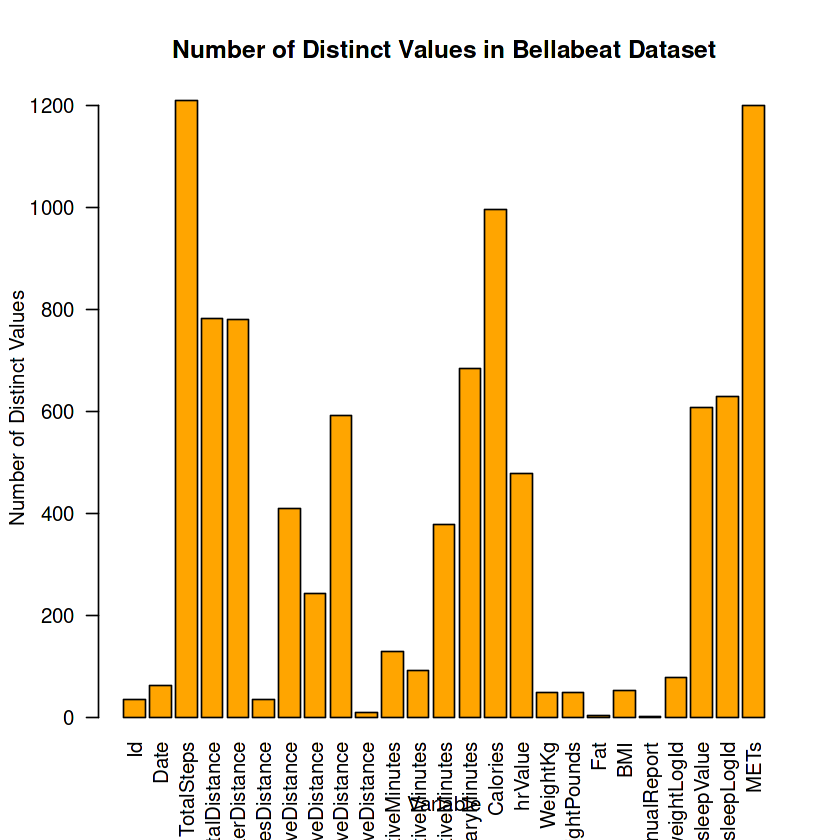

In [14]:
# Calculate the number of distinct values for each variable
distinct_counts <- sapply(bellabeat, function(x) length(unique(x)))

# Create a bar plot
barplot(distinct_counts, 
        main = "Number of Distinct Values in Bellabeat Dataset",
        xlab = "Variable",
        ylab = "Number of Distinct Values",
        col = "orange",
        ylim = c(0, max(distinct_counts) + 5),
        las = 2)  # Rotate x-axis labels vertically
                          
# In this bar graph you can see the types of data as columns that had the most usuage were TotalSteps and METs, followed by Calories.                         

## Count/Frequency of Usuage by Individual 

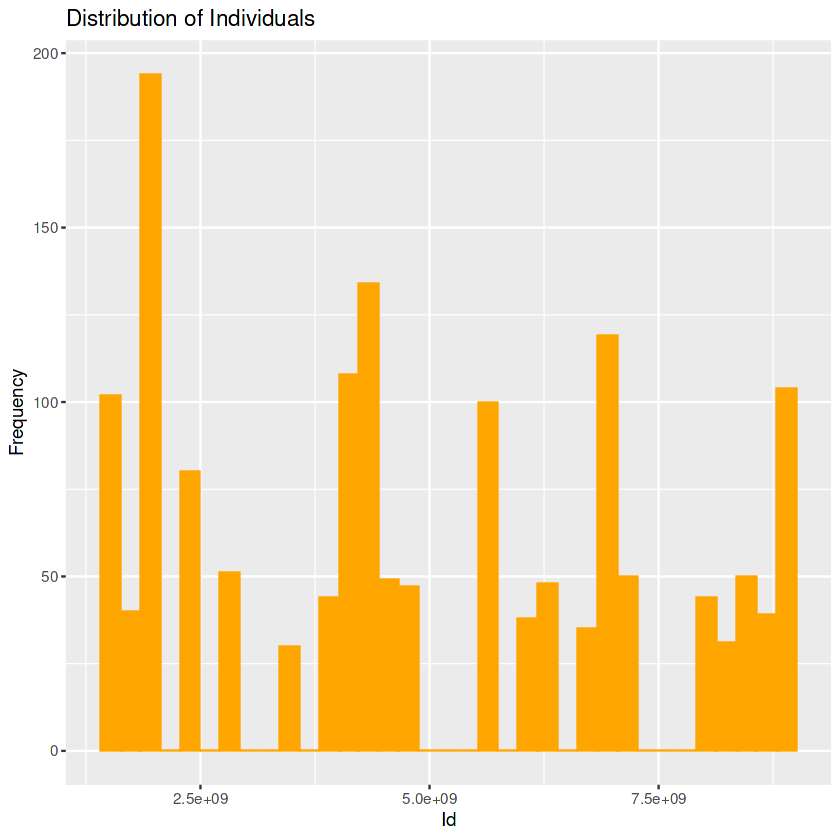

In [13]:
ggplot(bellabeat, aes(x = Id)) +
  geom_histogram(color = "orange", fill = "orange", bins = 35) +
  labs(x = "Id", y = "Frequency", title = "Distribution of Individuals")

# Correlation
## Checking for Correlations Between Different Smart Device Metrics to Guide Analysis

Correlation Coefficient: The correlation coefficient (r) measures the strength and direction of the linear relationship between two variables. It ranges from -1 to +1.

Values close to +1 indicate a strong positive correlation (as one variable increases, the other also tends to increase).
Values close to -1 indicate a strong negative correlation (as one variable increases, the other tends to decrease).
Values close to 0 indicate no linear correlation between the variables.

Using a p-value of 0.3, I will determine the statistically significant relationships, therefore the correlation coefficents in  print below should be .70 or greater.

### Result Discussed in Daily Activity
However, there is no 1.0  or complete correlations in Bellabeat, this is the same column associating to itsself.

In [15]:

# Based on the correlation of bellabeat a new column was created to include in the analysis

#Create new column, reorder, print
cat("Summary of Bellabeat w/ Minutes\n")
# Creating a new column in bellabeat to roll-up the minutes column for correlation analysis; Distance has a roll-up of LoggedActivitiesDistance

# Create the Minutes column and reorder columns
bellabeat <- bellabeat %>%
  mutate(Minutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes) %>%
    mutate(ActiveDistance = VeryActiveDistance + ModeratelyActiveDistance + LightActiveDistance + SedentaryActiveDistance) %>%
      ### select(-Distance, -ActiveDistances) %>%   # Drop the duplicated columns
        select(Id, Date, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, ActiveDistance, Minutes,everything())

# Display the first few rows to check the new column and column order
head(bellabeat)



# Select only numeric variables from the 'bellabeat' data frame
numeric_bellabeat <- bellabeat[sapply(bellabeat, is.numeric)]

# Exclude the date variable if it exists
if ("Date" %in% names(numeric_bellabeat)) {
  numeric_bellabeat <- numeric_bellabeat[, !names(numeric_bellabeat) %in% c("Date")]
}

# Exclude the Day variable if it exists and is character
if ("Day" %in% names(bellabeat) && class(bellabeat$Day) == "character") {
  numeric_bellabeat <- numeric_bellabeat[, !names(numeric_bellabeat) %in% c("Day")]
}

# Select the relevant columns from the bellabeat data frame; adjusted to highlight columns with correlations 
selected_columns <- numeric_bellabeat %>%
  select(TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, ActiveDistance, Minutes,  Calories,
         VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance,
         VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes)




# Compute correlations between all numeric variables in the data frame
correlation_matrix <- cor(selected_columns)


cat("Correlation Matrix of Bellabeat\n")
# Print the correlation matrix
View(correlation_matrix)



Summary of Bellabeat w/ Minutes


Id         Date       TotalSteps TotalDistance TrackerDistance
1 1503960366 2016-03-25 11004       7.11          7.11          
2 1503960366 2016-03-26 17609      11.55         11.55          
3 1503960366 2016-03-27 12736       8.53          8.53          
4 1503960366 2016-03-28 13231       8.93          8.93          
5 1503960366 2016-03-29 12041       7.85          7.85          
6 1503960366 2016-03-30 10970       7.16          7.16          
  LoggedActivitiesDistance ActiveDistance Minutes VeryActiveDistance
1 0                         7.10          1054    2.57              
2 0                        11.56           968    6.92              
3 0                         8.53           934    4.66              
4 0                         8.93          1363    3.19              
5 0                         7.86          1062    2.16              
6 0                         7.16          1440    2.36              
  ModeratelyActiveDistance ⋯ hrValue WeightKg WeightPounds Fat BMI
1 0.46                     ⋯ NA      NA       NA           NA  NA 
2 0.73                     ⋯ NA      NA       NA           NA  NA 
3 0.16                     ⋯ NA      NA       NA           NA  NA 
4 0.79                     ⋯ NA      NA       NA           NA  NA 
5 1.09                     ⋯ NA      NA       NA           NA  NA 
6 0.51                     ⋯ NA      NA       NA           NA  NA 
  weightIsManualReport weightLogId sleepValue sleepLogId  METs    
1 NA                   NA          1.098446   11220084662 16.01806
2 NA                   NA          1.082627   11227697258 18.95903
3 NA                   NA          1.053360   11232921149 17.11458
4 NA                   NA          1.051948   11240685157 17.01250
5 NA                   NA          1.087302   11251719164 16.60694
6 NA                   NA                NA            NA 16.02292

Adding missing grouping variables: `Id`


Correlation Matrix of Bellabeat


Id          TotalSteps  TotalDistance TrackerDistance
Id                        1.00000000  0.18190649  0.23275740    0.22904026    
TotalSteps                0.18190649  1.00000000  0.98577900    0.98420705    
TotalDistance             0.23275740  0.98577900  1.00000000    0.99816359    
TrackerDistance           0.22904026  0.98420705  0.99816359    1.00000000    
LoggedActivitiesDistance  0.19342840  0.15193667  0.16222417    0.12104054    
ActiveDistance            0.22481974  0.97389596  0.98714116    0.98514714    
Minutes                  -0.07284960  0.11318755  0.12608532    0.12416961    
Calories                  0.31149322  0.60385473  0.64414284    0.64415958    
VeryActiveDistance        0.32024325  0.74753580  0.80244698    0.80120554    
ModeratelyActiveDistance  0.03104598  0.50841715  0.47096852    0.47110983    
LightActiveDistance       0.02031834  0.73487899  0.70670211    0.70439526    
SedentaryActiveDistance  -0.02412115  0.07116629  0.07678989    0.07099828    
VeryActiveMinutes         0.32887159  0.67962330  0.69253820    0.69116017    
FairlyActiveMinutes       0.02303196  0.35311118  0.32896307    0.32975884    
LightlyActiveMinutes     -0.08871163  0.61701802  0.56876020    0.56286977    
SedentaryMinutes         -0.07268540 -0.19138704 -0.16185277   -0.16162587    
                         LoggedActivitiesDistance ActiveDistance Minutes     
Id                        0.193428396              0.22481974    -0.072849603
TotalSteps                0.151936672              0.97389596     0.113187547
TotalDistance             0.162224172              0.98714116     0.126085318
TrackerDistance           0.121040542              0.98514714     0.124169606
LoggedActivitiesDistance  1.000000000              0.16528261    -0.006711794
ActiveDistance            0.165282615              1.00000000     0.113361279
Minutes                  -0.006711794              0.11336128     1.000000000
Calories                  0.158597183              0.61672245     0.322961064
VeryActiveDistance        0.146617144              0.80707871     0.089270648
ModeratelyActiveDistance  0.060828108              0.47802750    -0.028274720
LightActiveDistance       0.109839667              0.72278123     0.116664981
SedentaryActiveDistance   0.109301667              0.07461401     0.101022961
VeryActiveMinutes         0.232364374              0.69946228     0.003757903
FairlyActiveMinutes       0.132154503              0.33389084     0.005221921
LightlyActiveMinutes      0.096604605              0.58801549     0.121720361
SedentaryMinutes         -0.071175738             -0.18173559     0.924024659
                         Calories   VeryActiveDistance ModeratelyActiveDistance
Id                       0.31149322  0.32024325         0.03104598             
TotalSteps               0.60385473  0.74753580         0.50841715             
TotalDistance            0.64414284  0.80244698         0.47096852             
TrackerDistance          0.64415958  0.80120554         0.47110983             
LoggedActivitiesDistance 0.15859718  0.14661714         0.06082811             
ActiveDistance           0.61672245  0.80707871         0.47802750             
Minutes                  0.32296106  0.08927065        -0.02827472             
Calories                 1.00000000  0.45721688         0.24522826             
VeryActiveDistance       0.45721688  1.00000000         0.20329579             
ModeratelyActiveDistance 0.24522826  0.20329579         1.00000000             
LightActiveDistance      0.51538123  0.22224887         0.26995967             
SedentaryActiveDistance  0.07065974  0.03689716         0.01253270             
VeryActiveMinutes        0.54909805  0.83374681         0.24516889             
FairlyActiveMinutes      0.30266900  0.15717700         0.70050452             
LightlyActiveMinutes     0.39026029  0.12859283         0.21533134             
SedentaryMinutes         0.10468670 -0.04756702        -0.17659754          

# Daily Acitivty - Distance 

In [16]:
# Daily Acitivty - Distance 

# Creates a new date frame looking at the percentage of activity
bellabeatDistance <- bellabeat %>%
  ungroup()%>%   # Removes the grouping of Id and Date applied to bellabeat to allow this new dataframe to be grouped and sorted differently.
  mutate(
    PercentageVeryActive = (VeryActiveDistance / ActiveDistance) * 100,
    PercentageModeratelyActive = (ModeratelyActiveDistance / ActiveDistance) * 100,
    PercentageLightActive = (LightActiveDistance / ActiveDistance) * 100,
    PercentageSedentaryActive = (SedentaryActiveDistance / ActiveDistance) * 100
  ) %>%
   select(Id,ActiveDistance,PercentageVeryActive, PercentageModeratelyActive, PercentageLightActive, PercentageSedentaryActive)


# Aggregate data by Id, because the program is grouping by Date and Id automatically. This will summarize the new columns by each individual that used the feature/metric.
bellabeatDistinctDistance <- bellabeatDistance %>%
  group_by(Id) %>%
  summarize(
    ActiveDistance = sum(ActiveDistance, na.rm = TRUE),
    PercentageVeryActive = mean(PercentageVeryActive, na.rm = TRUE),
    PercentageModeratelyActive = mean(PercentageModeratelyActive, na.rm = TRUE),
    PercentageLightActive = mean(PercentageLightActive, na.rm = TRUE),
    PercentageSedentaryActive = mean(PercentageSedentaryActive, na.rm = TRUE)
  ) %>%
  ungroup() %>%
  mutate(Count = row_number()) %>%   # Column that counts 
  select(Count, Id, ActiveDistance, PercentageVeryActive, PercentageModeratelyActive, PercentageLightActive, PercentageSedentaryActive)

cat("Usage Distribution by Individuals for Active Distances\n")
cat("NOTE: ActiveDistance is the sum of their individual total distance")
# Viewing results as a table 
View(bellabeatDistinctDistance)

Usage Distribution by Individuals for Active Distances
NOTE: ActiveDistance is the sum of their individual total distance

Count Id         ActiveDistance PercentageVeryActive
1   1    1503960366 386.32         35.3210559          
2   2    1624580081 183.05          4.9305913          
3   3    1644430081 226.34         11.6045979          
4   4    1844505072  86.15          0.7035758          
5   5    1927972279  40.10          5.0925797          
6   6    2022484408 395.10         32.5525336          
7   7    2026352035 144.44          0.5547445          
8   8    2320127002 133.10          2.4676572          
9   9    2347167796 218.87         12.6229018          
10 10    2873212765 211.76         10.7163910          
11 11    2891001357   4.83          0.0000000          
12 12    3372868164 136.25         13.6735312          
13 13    3977333714 301.08         20.0409120          
14 14    4020332650 152.99          4.5477078          
15 15    4057192912  59.51          2.6913814          
16 16    4319703577 204.07          5.7477890          
17 17    4388161847 248.54         17.0332799          
18 18    4445114986 151.30          9.4463169          
19 19    4558609924 215.95          7.6332996          
20 20    4702921684 317.23          4.8537132          
21 21    5553957443 316.55         19.3597775          
22 22    5577150313 259.02         46.3817266          
23 23    6117666160 203.79          1.5816315          
24 24    6290855005 136.09          2.6004020          
25 25    6391747486   9.67         33.3333333          
26 26    6775888955  82.41         24.9833050          
27 27    6962181067 484.80         38.8548853          
28 28    7007744171 362.90         33.9496711          
29 29    7086361926 276.41         32.9646374          
30 30    8053475328 497.30         66.9189125          
31 31    8253242879 108.81         32.9849310          
32 32    8378563200 324.55         26.0523145          
33 33    8583815059 156.50         10.7988892          
34 34    8792009665  63.13          1.4697961          
35 35    8877689391 731.85         37.3684728          
   PercentageModeratelyActive PercentageLightActive PercentageSedentaryActive
1   9.4790900                  55.19985             0.00000000               
2   3.6556290                  91.17274             0.24103891               
3  16.0064949                  72.21136             0.17754937               
4   1.9873107                  97.30911             0.00000000               
5   2.4941803                  92.41324             0.00000000               
6   8.4805621                  58.96690             0.00000000               
7   1.0218978                  98.42336             0.00000000               
8   2.4828526                  95.04949             0.00000000               
9  16.1387802                  71.23832             0.00000000               
10  5.5612742                  83.64417             0.07816642               
11  0.0000000                 100.00000             0.00000000               
12  2.6593379                  83.39328             0.27385044               
13 28.2548460                  51.70424             0.00000000               
14  5.6832995                  89.47811             0.29088602               
15  8.9327986                  88.31011             0.06571022               
16 10.5636891                  83.68852             0.00000000               
17 10.5868262                  72.37989             0.00000000               
18  1.3064271                  89.24726             0.00000000               
19  8.1853941                  84.18131             0.00000000               
20 13.8481139                  81.29817             0.00000000               
21 12.7570860                  67.88314             0.00000000               
22  9.9430730                  43.67520             0.00000000               
23  1.6433635                  96.77501             0.00000000               
24  4.0136378                  93.20087             0.18508703               
25  0.2219263                  66.444

# Daily Acitivty - Minutes

In [17]:
# Daily Activity - Minutes

bellabeatMinutes <- bellabeat %>%
  ungroup() %>%
  mutate(
    PercentageVeryActiveMinutes = (VeryActiveMinutes / Minutes) * 100,
    PercentageFairlyActiveMinutes = (FairlyActiveMinutes / Minutes) * 100,
    PercentageLightlyActiveMinutes = (LightlyActiveMinutes / Minutes) * 100,
    PercentageSedentaryMinutes = (SedentaryMinutes / Minutes) * 100
  ) %>%
  select(Id, Minutes, PercentageVeryActiveMinutes, PercentageFairlyActiveMinutes, PercentageLightlyActiveMinutes, PercentageSedentaryMinutes)

# Aggregate data by Id
bellabeatDistinctMinutes <- bellabeatMinutes %>%
  group_by(Id) %>%
  summarize(
    Minutes = sum(Minutes, na.rm = TRUE),
    PercentageVeryActiveMinutes = mean(PercentageVeryActiveMinutes, na.rm = TRUE),
    PercentageFairlyActiveMinutes = mean(PercentageFairlyActiveMinutes, na.rm = TRUE),
    PercentageLightlyActiveMinutes = mean(PercentageLightlyActiveMinutes, na.rm = TRUE),
    PercentageSedentaryMinutes = mean(PercentageSedentaryMinutes, na.rm = TRUE)
  ) %>%
  ungroup() %>%
  mutate(
    Days = floor(Minutes / (24 * 60)),  # Calculate number of days
    RemainingMinutes = Minutes %% (24 * 60),  # Calculate remaining minutes
    RemainingHours = round(RemainingMinutes / 60, 2),  # Round remaining hours to two decimal places
    DayAndTime = paste(Days, "days", RemainingHours, "hours"),  # Combine days and remaining time
    Count = row_number(),
    SamplePeriod = 61,  # Adjust if needed
    PercentageOverallUsage = (Days / SamplePeriod) * 100
  ) %>%   # Column that counts  
  select(Count, Id, Minutes, DayAndTime, PercentageOverallUsage, PercentageVeryActiveMinutes, PercentageFairlyActiveMinutes, PercentageLightlyActiveMinutes, PercentageSedentaryMinutes)

# Display results
cat("Usage Distribution by Individuals for Active Minutes\n")
cat("NOTE: Minutes is the sum of their individual total time\n")
View(bellabeatDistinctMinutes)

Usage Distribution by Individuals for Active Minutes
NOTE: Minutes is the sum of their individual total time


Count Id         Minutes DayAndTime          PercentageOverallUsage
1   1    1503960366 55610   38 days 14.83 hours 62.29508              
2   2    1624580081 72943   50 days 15.72 hours 81.96721              
3   3    1644430081 54340   37 days 17.67 hours 60.65574              
4   4    1844505072 57238   39 days 17.97 hours 63.93443              
5   5    1927972279 58670   40 days 17.83 hours 65.57377              
6   6    2022484408 67012   46 days 12.87 hours 75.40984              
7   7    2026352035 43694   30 days 8.23 hours  49.18033              
8   8    2320127002 62741   43 days 13.68 hours 70.49180              
9   9    2347167796 33862   23 days 12.37 hours 37.70492              
10 10    2873212765 61267   42 days 13.12 hours 68.85246              
11 11    2891001357 10809   7 days 12.15 hours  11.47541              
12 12    3372868164 42247   29 days 8.12 hours  47.54098              
13 13    3977333714 41558   28 days 20.63 hours 45.90164              
14 14    4020332650 85431   59 days 7.85 hours  96.72131              
15 15    4057192912 52192   36 days 5.87 hours  59.01639              
16 16    4319703577 43038   29 days 21.3 hours  47.54098              
17 17    4388161847 45470   31 days 13.83 hours 50.81967              
18 18    4445114986 52256   36 days 6.93 hours  59.01639              
19 19    4558609924 65803   45 days 16.72 hours 73.77049              
20 20    4702921684 48008   33 days 8.13 hours  54.09836              
21 21    5553957443 47632   33 days 1.87 hours  54.09836              
22 22    5577150313 41169   28 days 14.15 hours 45.90164              
23 23    6117666160 42157   29 days 6.62 hours  47.54098              
24 24    6290855005 54858   38 days 2.3 hours   62.29508              
25 25    6391747486 11718   8 days 3.3 hours    13.11475              
26 26    6775888955 46399   32 days 5.32 hours  52.45902              
27 27    6962181067 61867   42 days 23.12 hours 68.85246              
28 28    7007744171 57878   40 days 4.63 hours  65.57377              
29 29    7086361926 49428   34 days 7.8 hours   55.73770              
30 30    8053475328 60275   41 days 20.58 hours 67.21311              
31 31    8253242879 44408   30 days 20.13 hours 49.18033              
32 32    8378563200 45279   31 days 10.65 hours 50.81967              
33 33    8583815059 55770   38 days 17.5 hours  62.29508              
34 34    8792009665 50605   35 days 3.42 hours  57.37705              
35 35    8877689391 74763   51 days 22.05 hours 83.60656              
   PercentageVeryActiveMinutes PercentageFairlyActiveMinutes
1  3.41224601                  1.62010484                   
2  0.37793803                  0.25507479                   
3  0.75989456                  1.90410828                   
4  0.02006173                  0.08813649                   
5  0.05694444                  0.06752767                   
6  2.91070746                  1.35700967                   
7  0.02672606                  0.07126949                   
8  0.10185185                  0.15740741                   
9  1.19014979                  1.95966787                   
10 0.80426357                  0.42312661                   
11 0.00000000                  5.72916667                   
12 0.72615462                  0.27617794                   
13 2.10249900                  5.02640178                   
14 0.35039743                  0.55623244                   
15 0.08123832                  0.32512284                   
16 0.43178766                  1.42151147                   
17 1.76818670                  1.51374763                   
18 0.52569016                  0.13261801                   
19 0.54185459                  0.66503298                   
20 0.43076569                  2.26348966                   
21 2.72485521                  2.39916761                   
22 9.22576725                  3.18143183                   
23 0.13188792                  0.24527753   

# Date

I began by creating a weekday column to analyze for trends by Day. 

We can see that Tuesday has significantly more activity for the metrics from the Daily Activity subset.
Otherwise the data appears to have been about even daily, suggesting a consistent usage pattern for the other metrics.


Bar Plots of Metrics Summarized by Day
Each display about even usage from day to day


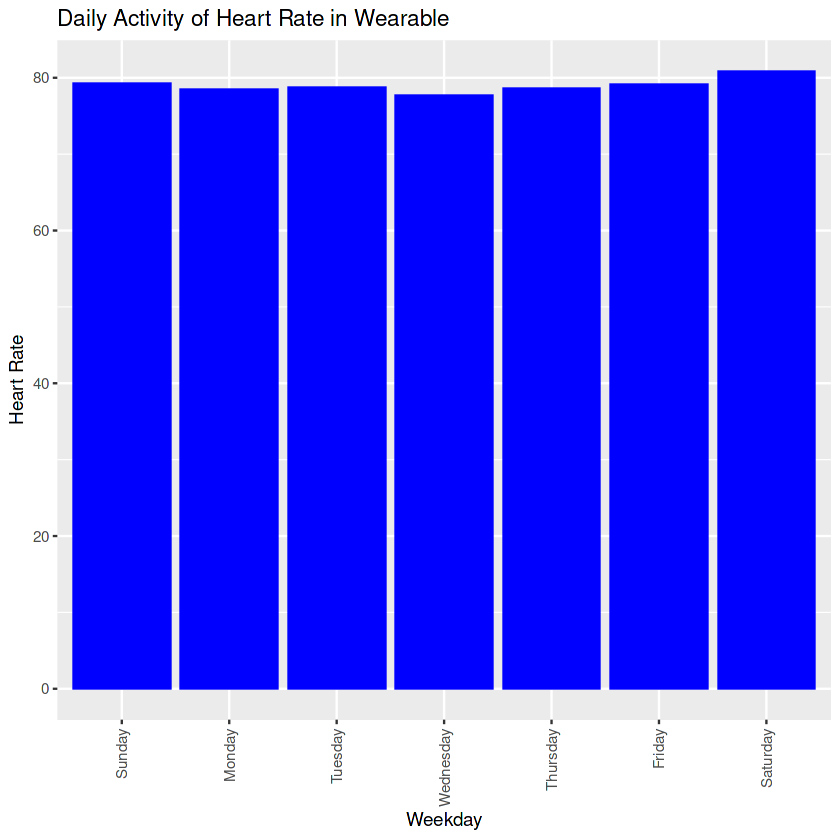

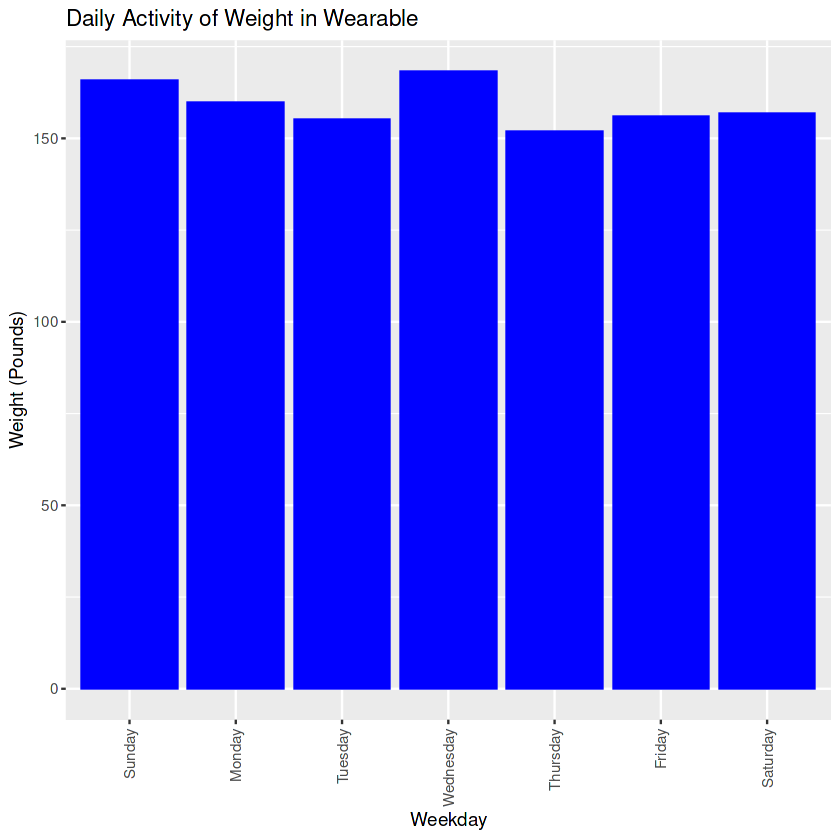

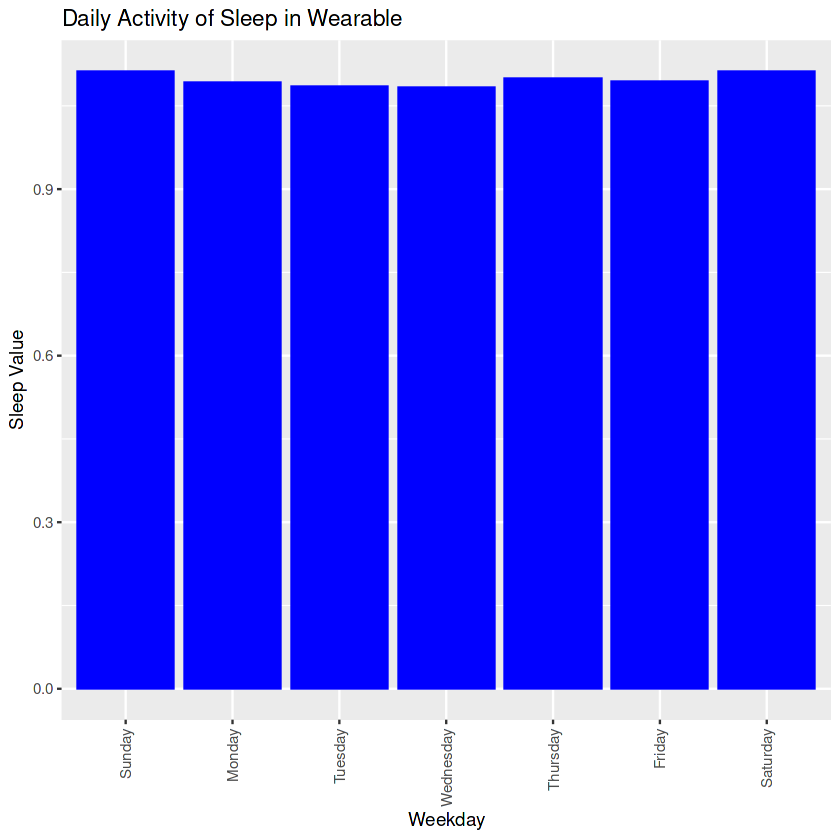

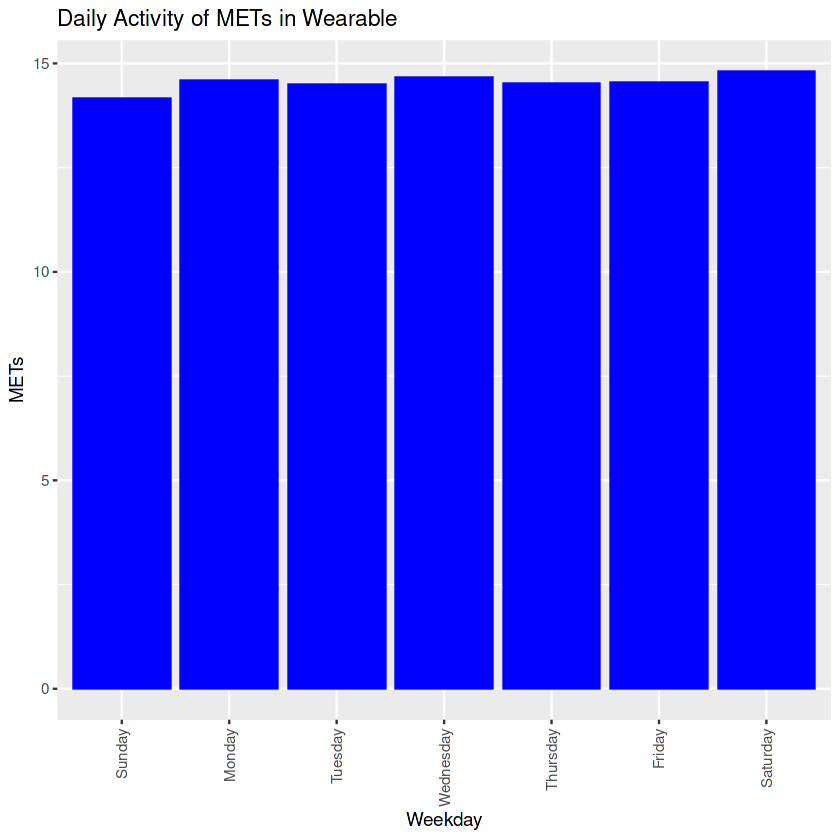

In [49]:
cat("Bar Plots of Metrics Summarized by Day\n")
cat("Each display about even usage from day to day\n")

# Create the bar plot for heart rate
 ggplot(summary_hr, aes(x = Day, y = hrValue)) + 
   geom_bar(stat = "identity", color = "blue", fill = "blue") +
   labs(x = "Weekday", y = "Heart Rate", title = "Daily Activity of Heart Rate in Wearable") +
   theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Create the bar plot for weight, didn't yield. Code removed for notebook space.
 ggplot(summary_w, aes(x = Day, y = WeightPounds)) + 
   geom_bar(stat = "identity", color = "blue", fill = "blue") +
   labs(x = "Weekday", y = "Weight (Pounds)", title = "Daily Activity of Weight in Wearable") +
   theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Create the bar plot for sleep, didn't yield. Code removed for notebook space.
 ggplot(summary_s, aes(x = Day, y = sleepValue)) + 
   geom_bar(stat = "identity", color = "blue", fill = "blue") +
   labs(x = "Weekday", y = "Sleep Value", title = "Daily Activity of Sleep in Wearable") +
   theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Create the bar plot for METs, didn't yield. Code removed for notebook space.
 ggplot(summary_METs, aes(x = Day, y = METs)) + 
   geom_bar(stat = "identity", color = "blue", fill = "blue") +
   labs(x = "Weekday", y = "METs", title = "Daily Activity of METs in Wearable") +
   theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

Checking for new Day columnn

[1] Friday    Saturday  Sunday    Monday    Tuesday   Wednesday
Levels: Sunday Monday Tuesday Wednesday Thursday Friday Saturday

Bar Plots of Metrics Summarized by Day
Showing more activity on Tuesdays


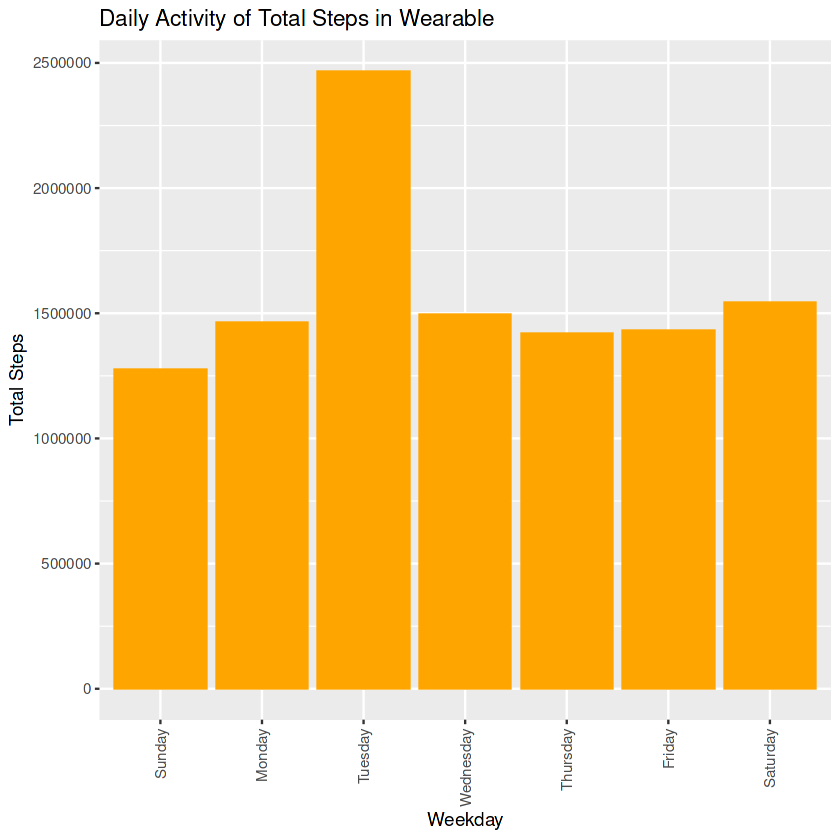

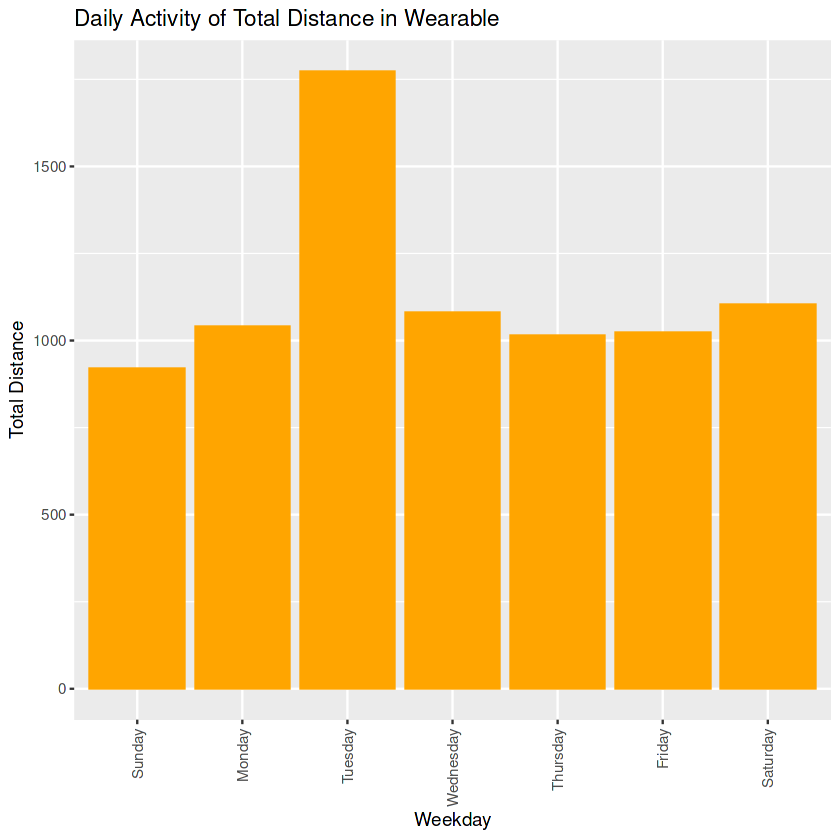

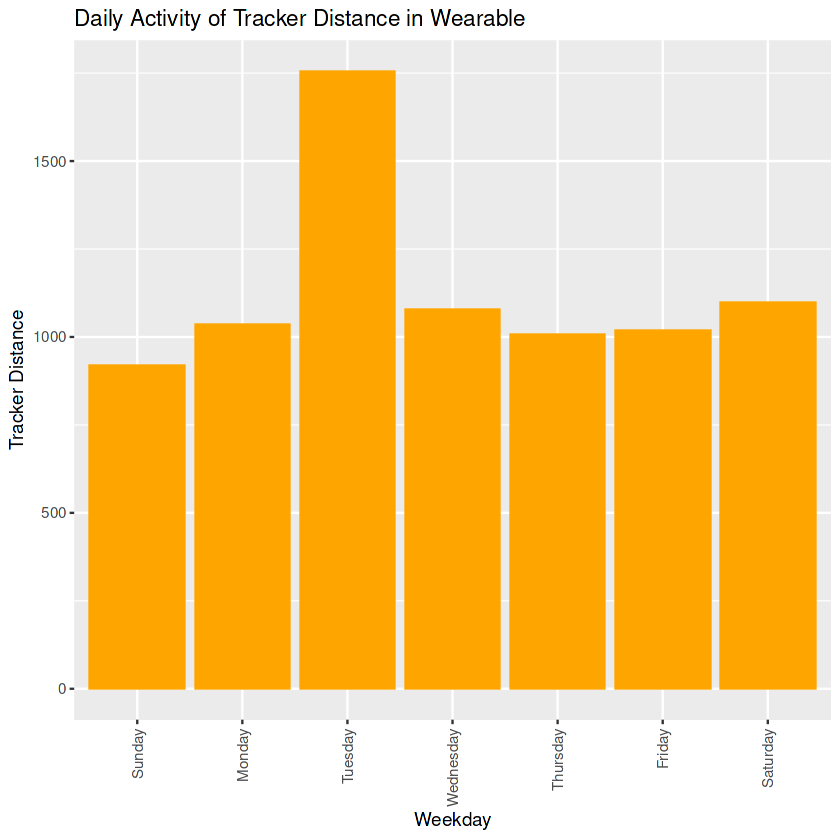

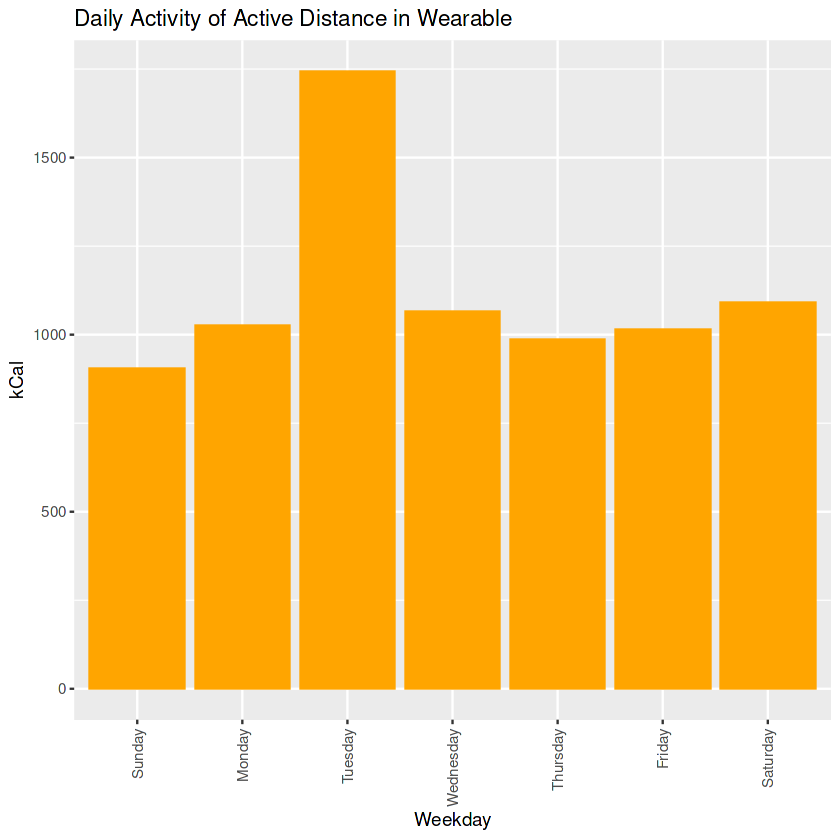

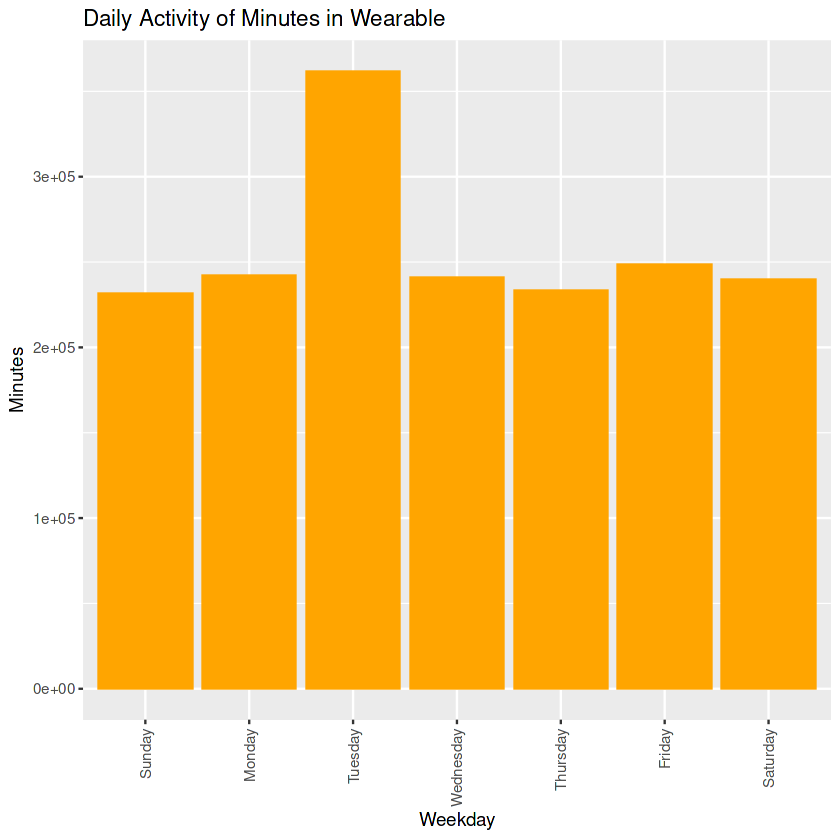

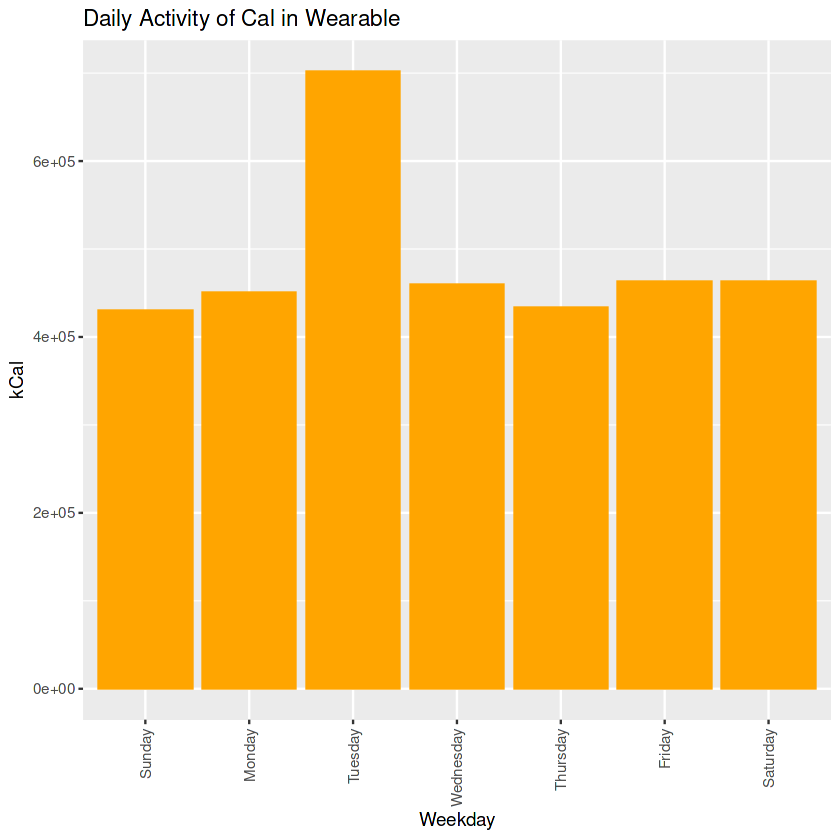

In [19]:
# Creating a variable that correlates the Date to weekdays, now I can look for trends across the week.
bellabeat$Day <- weekdays(bellabeat$Date)
bellabeat$Day <- factor(bellabeat$Day, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

cat("Checking for new Day columnn") 
# Check the result
head(bellabeat$Day)

# Remove this 

# Completing a distinct count on metrics to correctly apply to bar plot
distinct_count_tsteps <- table(bellabeat$TotalSteps, bellabeat$Id)
distinct_count_hr <- table(bellabeat$hrValue, bellabeat$Id)
distinct_count_w <- table(bellabeat$WeightPounds, bellabeat$Id)
distinct_count_s <- table(bellabeat$sleepValue, bellabeat$Id)

# Create summaries by Day for various metrics
summary_tsteps <- aggregate(TotalSteps ~ Day, data = bellabeat, FUN = sum)
summary_tracker <- aggregate(TrackerDistance ~ Day, data = bellabeat, FUN = sum)
summary_total <- aggregate(TotalDistance ~ Day, data = bellabeat, FUN = sum)
summary_actived <- aggregate(ActiveDistance ~ Day, data = bellabeat, FUN = sum)

summary_min <- aggregate(Minutes ~ Day, data = bellabeat, FUN = sum)

summary_cal <- aggregate(Calories ~ Day, data = bellabeat, FUN = sum)



summary_hr <- aggregate(hrValue ~ Day, data = bellabeat, FUN = mean)
summary_w <- aggregate(WeightPounds ~ Day, data = bellabeat, FUN = mean)
summary_s <- aggregate(sleepValue ~ Day, data = bellabeat, FUN = mean)
summary_METs <- aggregate(METs ~ Day, data = bellabeat, FUN = mean)

cat("Bar Plots of Metrics Summarized by Day\n") 
cat("Showing more activity on Tuesdays\n")

# Create the bar plot for daily activity of Total Steps
ggplot(summary_tsteps, aes(x = Day, y = TotalSteps)) + 
  geom_bar(stat = "identity", color = "orange", fill = "orange") +
  labs(x = "Weekday", y = "Total Steps", title = "Daily Activity of Total Steps in Wearable") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Create the bar plot for daily activity of Total Distance
ggplot(summary_total, aes(x = Day, y = TotalDistance)) + 
  geom_bar(stat = "identity", color = "orange", fill = "orange") +
  labs(x = "Weekday", y = "Total Distance", title = "Daily Activity of Total Distance in Wearable") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Create the bar plot for daily activity of Tracker Distance
ggplot(summary_tracker, aes(x = Day, y = TrackerDistance)) + 
  geom_bar(stat = "identity", color = "orange", fill = "orange") +
  labs(x = "Weekday", y = "Tracker Distance", title = "Daily Activity of Tracker Distance in Wearable") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Create the bar plot for daily activity of Active Distance
ggplot(summary_actived, aes(x = Day, y = ActiveDistance)) + 
  geom_bar(stat = "identity", color = "orange", fill = "orange") +
  labs(x = "Weekday", y = "kCal", title = "Daily Activity of Active Distance in Wearable") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Create the bar plot for daily activity of  Minutes
ggplot(summary_min, aes(x = Day, y = Minutes)) + 
  geom_bar(stat = "identity", color = "orange", fill = "orange") +
  labs(x = "Weekday", y = "Minutes", title = "Daily Activity of Minutes in Wearable") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Create the bar plot for daily activity of Calories
ggplot(summary_cal, aes(x = Day, y = Calories)) + 
  geom_bar(stat = "identity", color = "orange", fill = "orange") +
  labs(x = "Weekday", y = "kCal", title = "Daily Activity of Cal in Wearable") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))



# Tuesday
## Is there really a Tuesday trend? 

In [58]:
# Creating a new data frame of selected columns 
tuesdaydata <- bellabeat %>%
  filter(Day == "Tuesday") %>%
  select(Date, Id, TotalSteps, TotalDistance, TrackerDistance, ActiveDistance, Minutes)

# Summarize the data by ID for entries on Tuesday
tuesdaysummary <- tuesdaydata %>%
  ungroup() %>%
  group_by(Id) %>%
  summarize(
    TotalSteps = sum(TotalSteps, na.rm = TRUE),
    TotalDistance = sum(TotalDistance, na.rm = TRUE),
    TrackerDistance = sum(TrackerDistance, na.rm = TRUE),
    ActiveDistance = sum(ActiveDistance, na.rm = TRUE),
    Minutes = sum(Minutes, na.rm = TRUE)
  ) %>%
  mutate(
    Count = row_number()
  ) %>%
  select(Count, Id, TotalSteps, TotalDistance, TrackerDistance, ActiveDistance, Minutes) %>%
  ungroup()


cat("Total Tuesdays Activity")
# Viewing results as a table
View(tuesdaysummary)


# Summarize the data by ID for entries on Tuesday
tuesdaysummaryAVG <- tuesdaydata %>%
  ungroup() %>%
  group_by(Id) %>%
  summarize(
    TotalSteps = mean(TotalSteps, na.rm = TRUE),
    TotalDistance = mean(TotalDistance, na.rm = TRUE),
    TrackerDistance = mean(TrackerDistance, na.rm = TRUE),
    ActiveDistance = mean(ActiveDistance, na.rm = TRUE),
    Minutes = mean(Minutes, na.rm = TRUE)
  ) %>%
  mutate(
    Count = row_number()
  ) %>%
  select(Count, Id, TotalSteps, TotalDistance, TrackerDistance, ActiveDistance, Minutes) %>%
  ungroup()

cat("Total Tuesdays Activity by Individual Averages")
# View the summarized data
View(tuesdaysummaryAVG)


Total Tuesdays Activity

Count Id         TotalSteps TotalDistance TrackerDistance ActiveDistance
1   1    1503960366  96842      62.32         62.32           62.32        
2   2    1624580081  43278      28.16         28.16           28.14        
3   3    1644430081  63807      46.37         46.37           46.41        
4   4    1844505072  17650      11.67         11.67           11.67        
5   5    1927972279  10129       7.03          7.03            7.02        
6   6    2022484408 131821      93.27         93.27           93.28        
7   7    2026352035  41980      26.04         26.04           26.04        
8   8    2320127002  53653      36.68         36.68           36.68        
9   9    2347167796  53303      35.66         35.66           35.61        
10 10    2873212765  49105      33.03         33.03           33.02        
11 11    2891001357   2063       1.61          0.00            1.61        
12 12    3372868164  25201      17.33         17.33           17.33        
13 13    3977333714  82742      56.10         56.10           55.97        
14 14    4020332650  67830      48.64         48.64           43.50        
15 15    4057192912  21860      16.29         16.29           15.99        
16 16    4319703577  59714      40.09         40.09           34.90        
17 17    4388161847  52790      40.60         40.60           32.81        
18 18    4445114986  40565      27.56         27.56           27.54        
19 19    4558609924  58630      38.72         38.72           38.68        
20 20    4702921684  53272      43.24         43.24           43.21        
21 21    5553957443 188136     122.83        122.83          122.64        
22 22    5577150313  54912      41.08         41.08           41.06        
23 23    6117666160  30588      23.10         23.10           23.10        
24 24    6290855005  17751      13.42         13.42           13.42        
25 25    6391747486   9766       7.51          0.78            7.51        
26 26    6775888955  16448      11.98         11.98           11.40        
27 27    6962181067 318214     210.51        210.51          210.50        
28 28    7007744171 142218     104.83         95.15          104.86        
29 29    7086361926 100262      71.58         71.58           71.40        
30 30    8053475328 112775      87.43         87.43           87.45        
31 31    8253242879  17807      12.98         12.98           12.98        
32 32    8378563200 100906      80.01         80.01           79.96        
33 33    8583815059  48300      37.67         37.67           28.30        
34 34    8792009665  16410      10.49         10.49           10.49        
35 35    8877689391 266420     227.75        227.75          227.34        
   Minutes
1   7795  
2  12906  
3   8640  
4  10932  
5  10402  
6  15616  
7  10145  
8  11452  
9   7456  
10 10080  
11  2169  
12  5760  
13  7346  
14 15939  
15  9462  
16  7069  
17  8065  
18 10999  
19 15442  
20  8418  
21 15031  
22  5852  
23  6595  
24  8640  
25  1440  
26  7200  
27 25636  
28 13478  
29  9838  
30 11310  
31  7200  
32 10395  
33  8640  
34 11053  
35 23432

Total Tuesdays Activity by Individual Averages

Count Id         TotalSteps TotalDistance TrackerDistance ActiveDistance
1   1    1503960366 12105.2500  7.7899999     7.7899999       7.7900000    
2   2    1624580081  4327.8000  2.8160000     2.8160000       2.8140000    
3   3    1644430081 10634.5000  7.7283334     7.7283334       7.7350000    
4   4    1844505072  1961.1111  1.2966666     1.2966666       1.2966666    
5   5    1927972279   779.1538  0.5407692     0.5407692       0.5400000    
6   6    2022484408 10140.0769  7.1746153     7.1746153       7.1753847    
7   7    2026352035  3229.2308  2.0030769     2.0030769       2.0030769    
8   8    2320127002  5961.4444  4.0755555     4.0755555       4.0755556    
9   9    2347167796  6662.8750  4.4575000     4.4575000       4.4512499    
10 10    2873212765  7015.0000  4.7185714     4.7185714       4.7171429    
11 11    2891001357  1031.5000  0.8050000     0.0000000       0.8050000    
12 12    3372868164  6300.2500  4.3325000     4.3325000       4.3324999    
13 13    3977333714  9193.5556  6.2333332     6.2333332       6.2188889    
14 14    4020332650  4239.3750  3.0400000     3.0400000       2.7187500    
15 15    4057192912  2732.5000  2.0362501     2.0362501       1.9987500    
16 16    4319703577  8530.5714  5.7271427     5.7271427       4.9857142    
17 17    4388161847  7541.4286  5.8000001     5.8000001       4.6871429    
18 18    4445114986  2897.5000  1.9685714     1.9685714       1.9671429    
19 19    4558609924  4510.0000  2.9784616     2.9784616       2.9753846    
20 20    4702921684  6659.0000  5.4050000     5.4050000       5.4012500    
21 21    5553957443  8958.8571  5.8490477     5.8490477       5.8399999    
22 22    5577150313  9152.0000  6.8466667     6.8466667       6.8433333    
23 23    6117666160  6117.6000  4.6200000     4.6200000       4.6200000    
24 24    6290855005  2958.5000  2.2366667     2.2366667       2.2366667    
25 25    6391747486  9766.0000  7.5100002     0.7800000       7.5100000    
26 26    6775888955  3289.6000  2.3960000     2.3960000       2.2800000    
27 27    6962181067  8600.3784  5.6894594     5.6894594       5.6891893    
28 28    7007744171 11851.5000  8.7358333     7.9291666       8.7383332    
29 29    7086361926  7712.4615  5.5061538     5.5061538       5.4923077    
30 30    8053475328 12530.5556  9.7144443     9.7144443       9.7166668    
31 31    8253242879  3561.4000  2.5960000     2.5960000       2.5960000    
32 32    8378563200  7762.0000  6.1546154     6.1546154       6.1507692    
33 33    8583815059  8050.0000  6.2783332     6.2783332       4.7166666    
34 34    8792009665  1262.3077  0.8069231     0.8069231       0.8069231    
35 35    8877689391 12686.6667 10.8452379    10.8452379      10.8257145    
   Minutes  
1   974.3750
2  1290.6000
3  1440.0000
4  1214.6667
5   800.1538
6  1201.2308
7   780.3846
8  1272.4444
9   932.0000
10 1440.0000
11 1084.5000
12 1440.0000
13  816.2222
14  996.1875
15 1182.7500
16 1009.8571
17 1152.1429
18  785.6429
19 1187.8462
20 1052.2500
21  715.7619
22  975.3333
23 1319.0000
24 1440.0000
25 1440.0000
26 1440.0000
27  692.8649
28 1123.1667
29  756.7692
30 1256.6667
31 1440.0000
32  799.6154
33 1440.0000
34  850.2308
35 1115.8095

# Data Analysis

# Daily Activity

Daily Activity data consists of the following data points/metrics:
TotalSteps, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes,  LightlyActiveMinutes, SedentaryMinutes
In addition to the created summary data points, Minutes and ActiveDistance.

Correlations 
The correlations in the table below have strong positive linear relationships. Each relationship is visualized below with a trend line. It is, however, anticipatable that the activity data would correlate to itself as they are all measures of exertion.

•	TotalSteps, as opposed to exercise sessions captured in Minutes, drive individual TotalDistance, TrackerDistance, and Calories. 

     Therefore, users who count steps have a greater impact on their daily calories burned and distance traveled.

•	TotalDistance, TrackerDistance, and ActiveDistance all correlate to each other and TotalSteps.

•	The greater ActiveDistance stronger impact on TotalSteps, TotalDistance, TrackerDistance, and Calories


### Summary of Correlation Matrix for Bellabeat

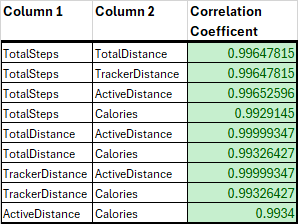

## Total Steps 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


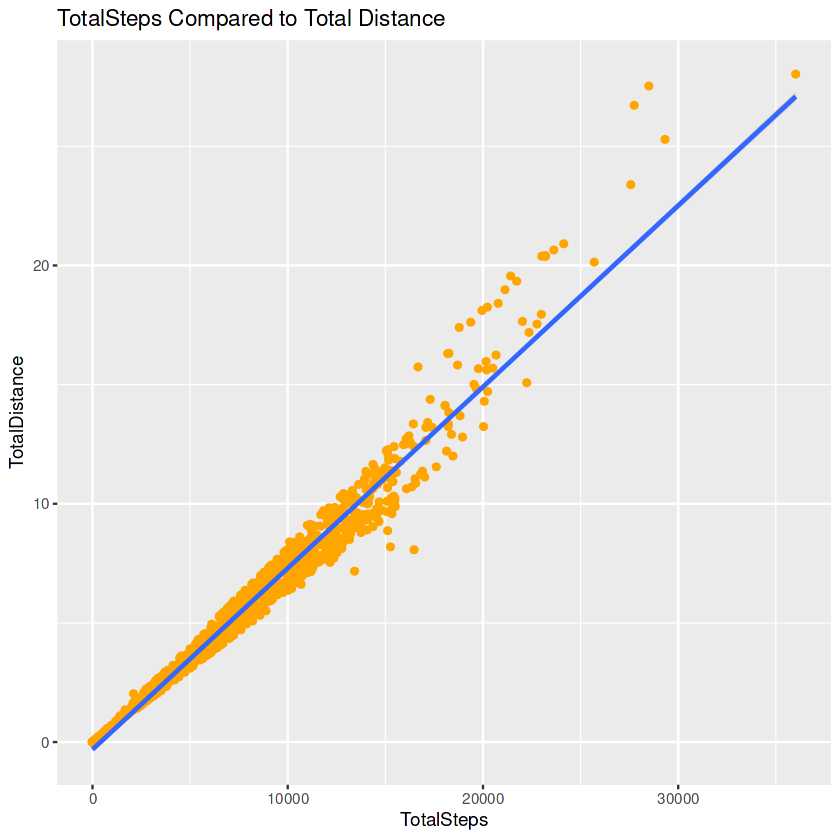

`geom_smooth()` using formula = 'y ~ x'


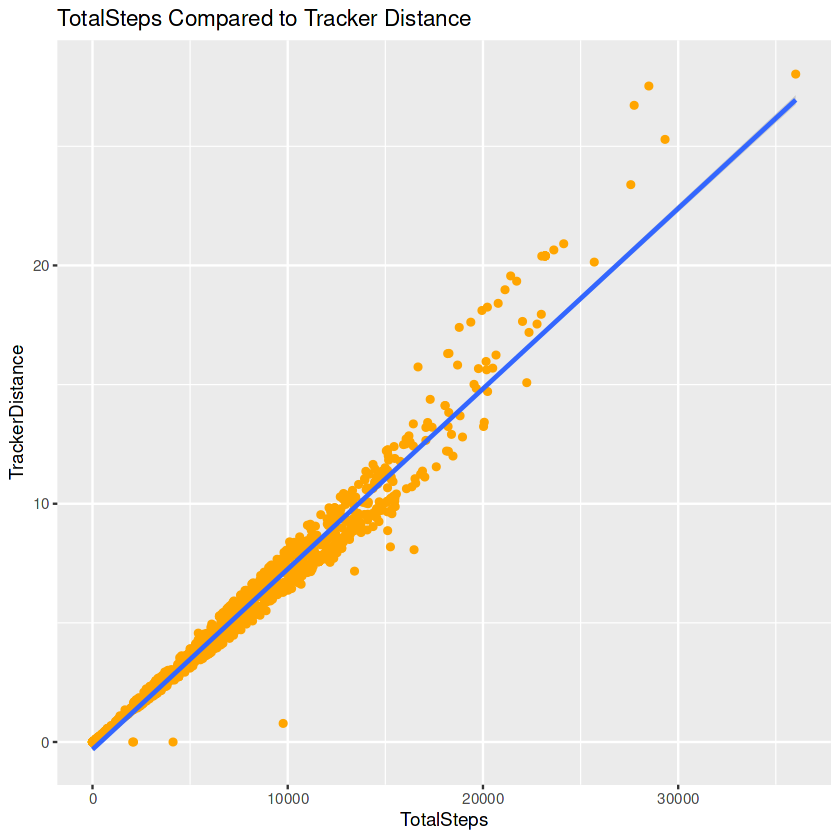

`geom_smooth()` using formula = 'y ~ x'


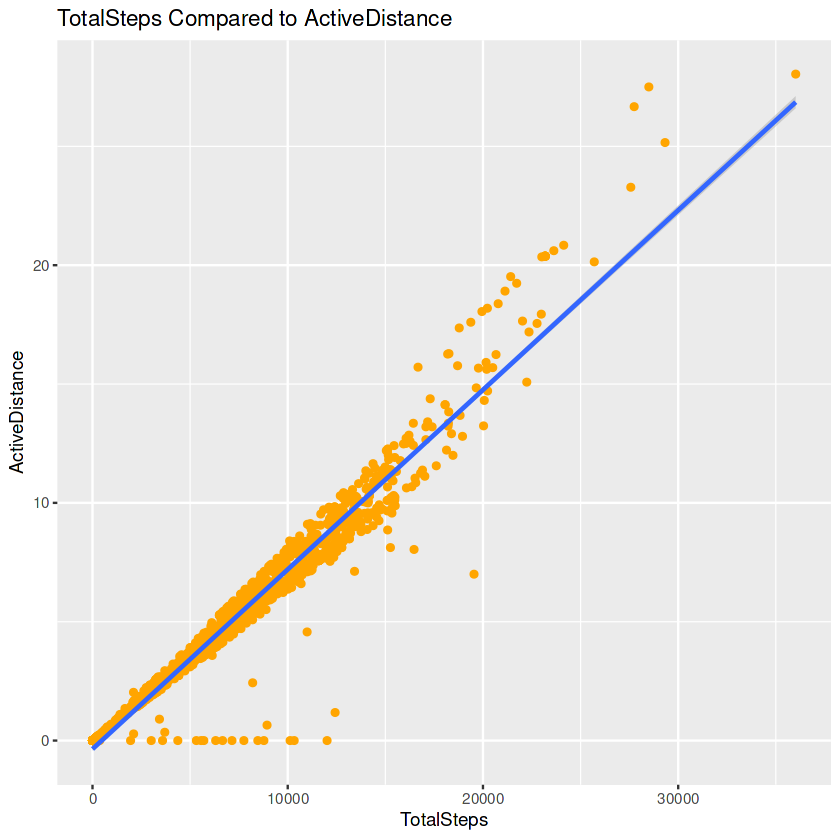

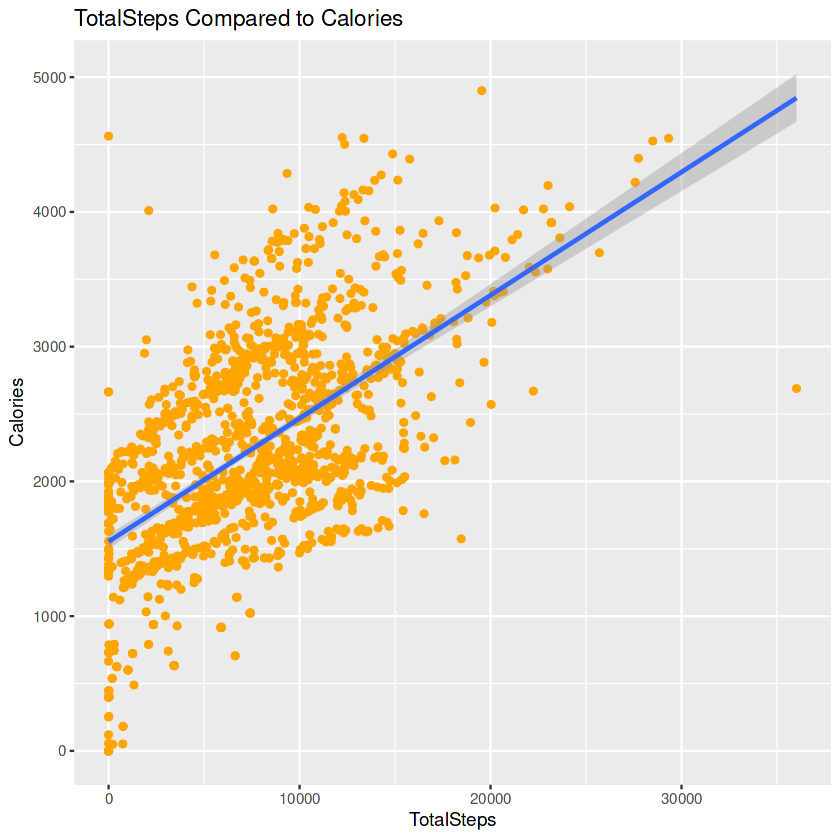

In [23]:
# Create a scatter plots for Total Steps
ggplot(bellabeat, aes(x = TotalSteps, y = TotalDistance)) +
  geom_point(color = "orange") +
  labs(title = "TotalSteps Compared to Total Distance") +
   geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)   # changing from auto to lm = linear

ggplot(bellabeat, aes(x = TotalSteps, y = TrackerDistance)) +
  geom_point(color = "orange") +
  labs(title = "TotalSteps Compared to Tracker Distance") +
   geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)   # changing from auto to lm = linear

#Crate a scatter plot for TotalSteps and ActiveDistance
ggplot(bellabeat, aes(x = TotalSteps, y = ActiveDistance)) +
  geom_point(color = "orange") +
  labs(title = "TotalSteps Compared to ActiveDistance") +
   geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)   # changing from auto to lm = linear

#Crate a scatter plot for TotalSteps and Calories
ggplot(bellabeat, aes(x = TotalSteps, y = Calories)) +
  geom_point(color = "orange") +
  labs(title = "TotalSteps Compared to Calories") +
   geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)   # changing from auto to lm = linear


## Total Distance 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


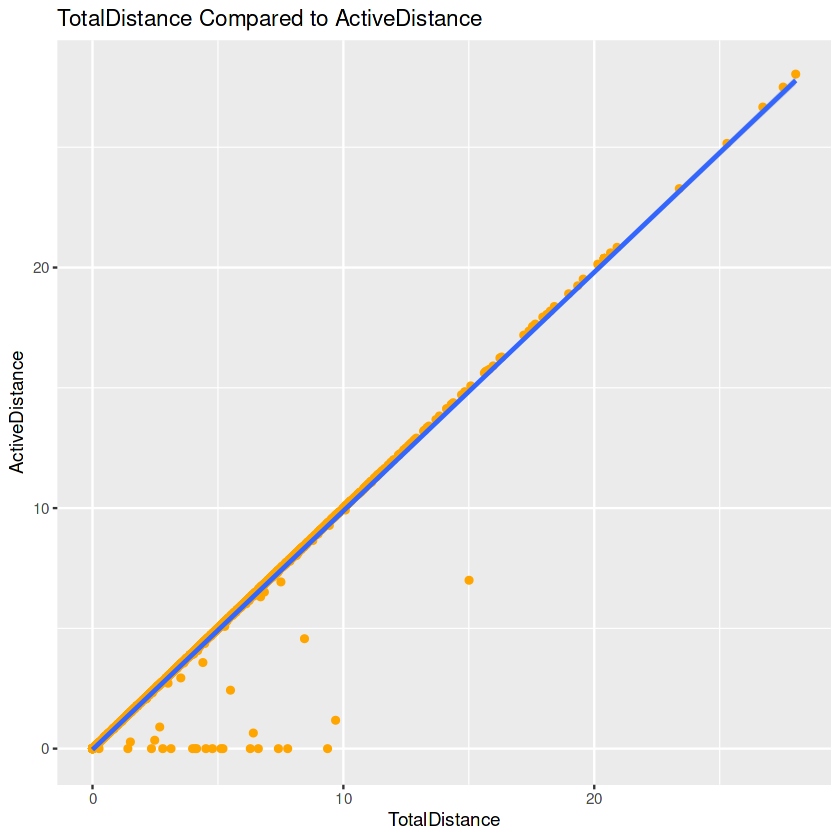

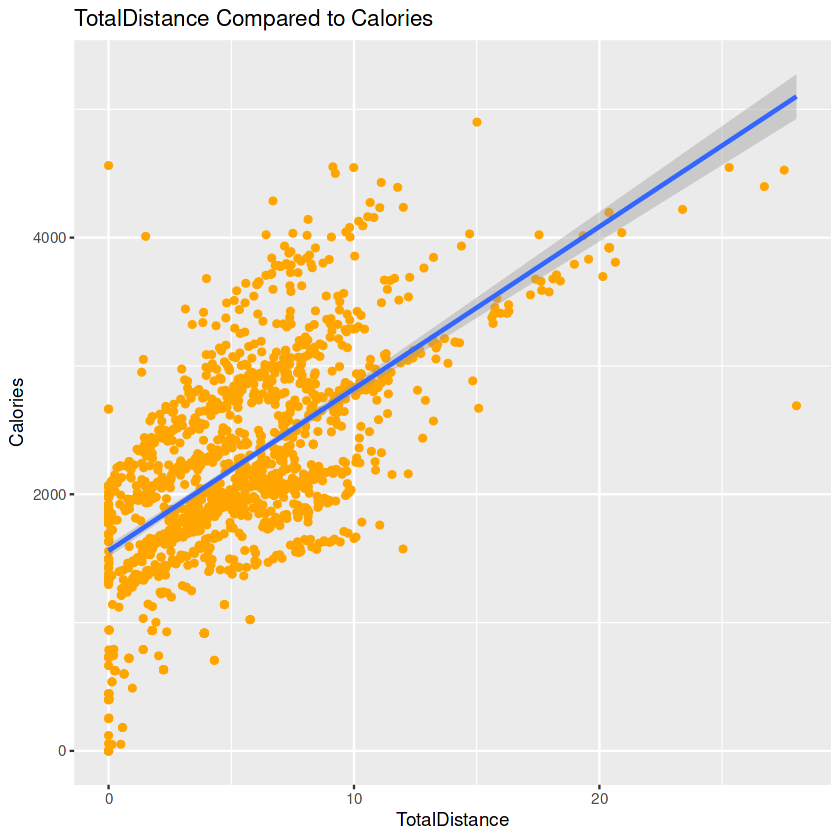

In [24]:
# Creates scatter plots for Total Distance

ggplot(bellabeat, aes(x = TotalDistance, y = ActiveDistance)) +
  geom_point(color = "orange") +
  labs(title = "TotalDistance Compared to ActiveDistance") +
   geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)   # changing from auto to lm = linear


ggplot(bellabeat, aes(x = TotalDistance, y = Calories)) +
  geom_point(color = "orange") +
  labs(title = "TotalDistance Compared to Calories") +
   geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)   # changing from auto to lm = linear


## Tracker Distance

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


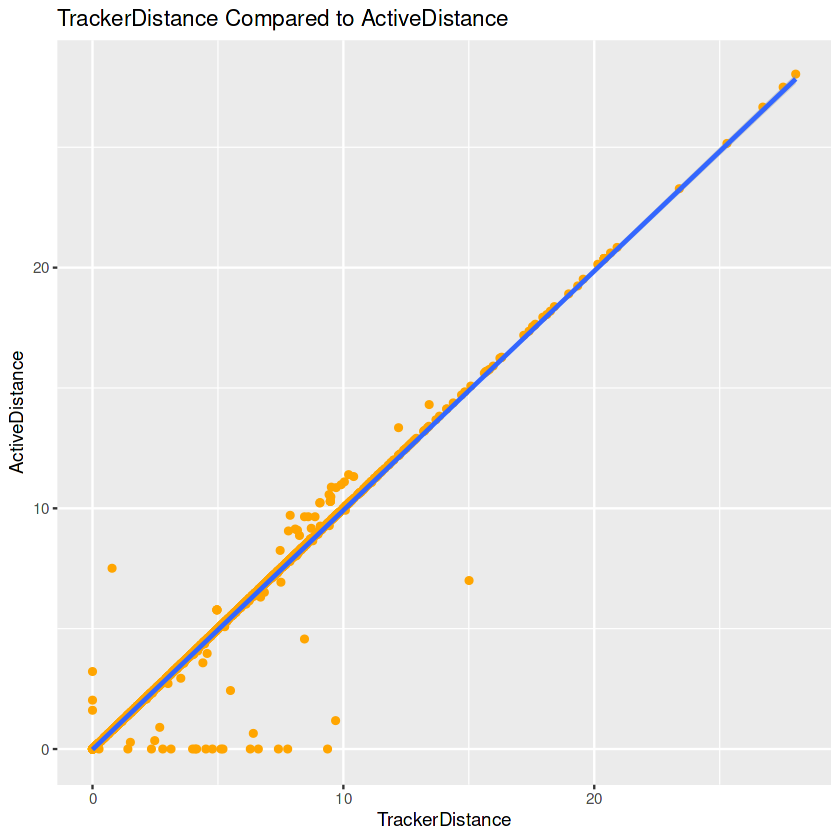

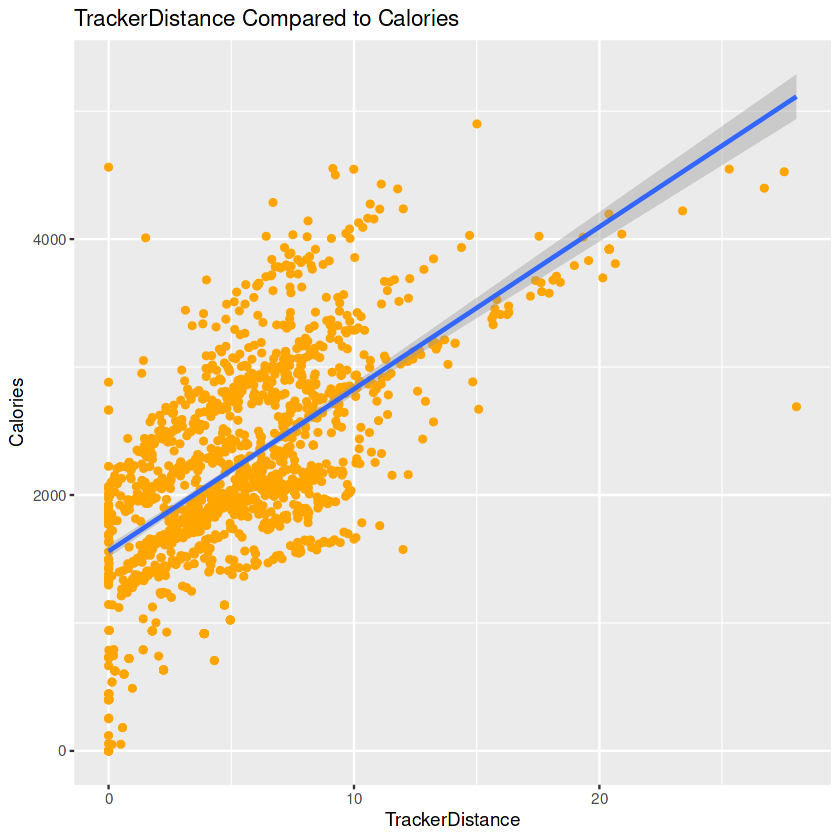

In [25]:
# Creates scatter plots for TrackerDistance

ggplot(bellabeat, aes(x = TrackerDistance, y = ActiveDistance)) +
  geom_point(color = "orange") +
  labs(title = "TrackerDistance Compared to ActiveDistance") +
   geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)   # changing from auto to lm = linear


ggplot(bellabeat, aes(x = TrackerDistance, y = Calories)) +
  geom_point(color = "orange") +
  labs(title = "TrackerDistance Compared to Calories") +
   geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)   # changing from auto to lm = linear


## Active Distance

`geom_smooth()` using formula = 'y ~ x'


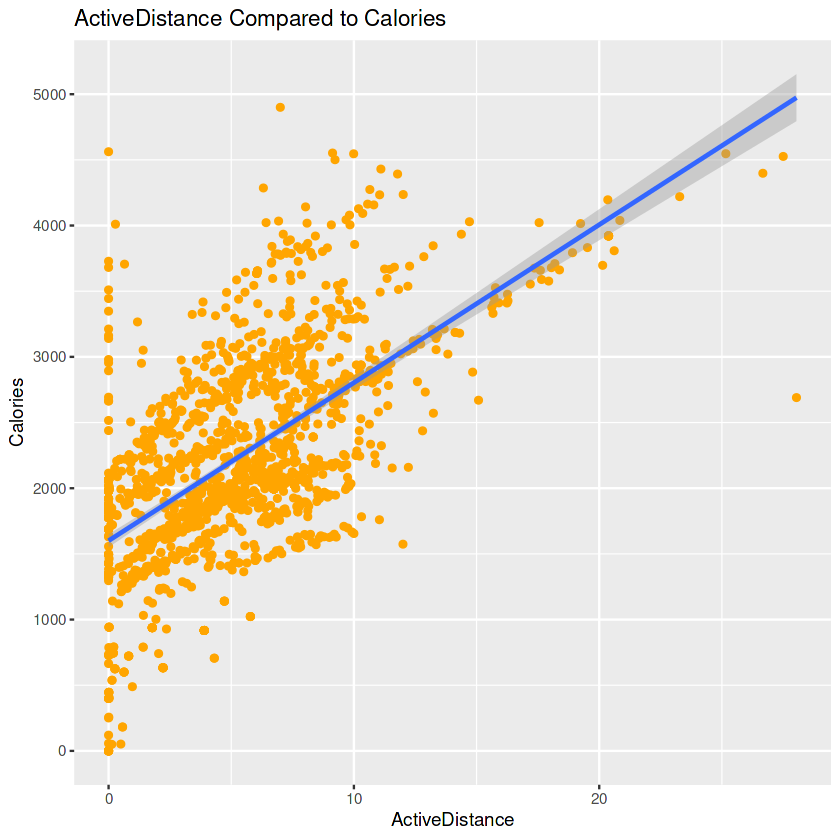

In [26]:
ggplot(bellabeat, aes(x = ActiveDistance, y = Calories)) +
  geom_point(color = "orange") +
  labs(title = "ActiveDistance Compared to Calories") +
   geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)


# Distribution of Active Distance 

34 out of 35 users spent most of their time in LightActiveDistance; the other user was VeryActiveDistance.


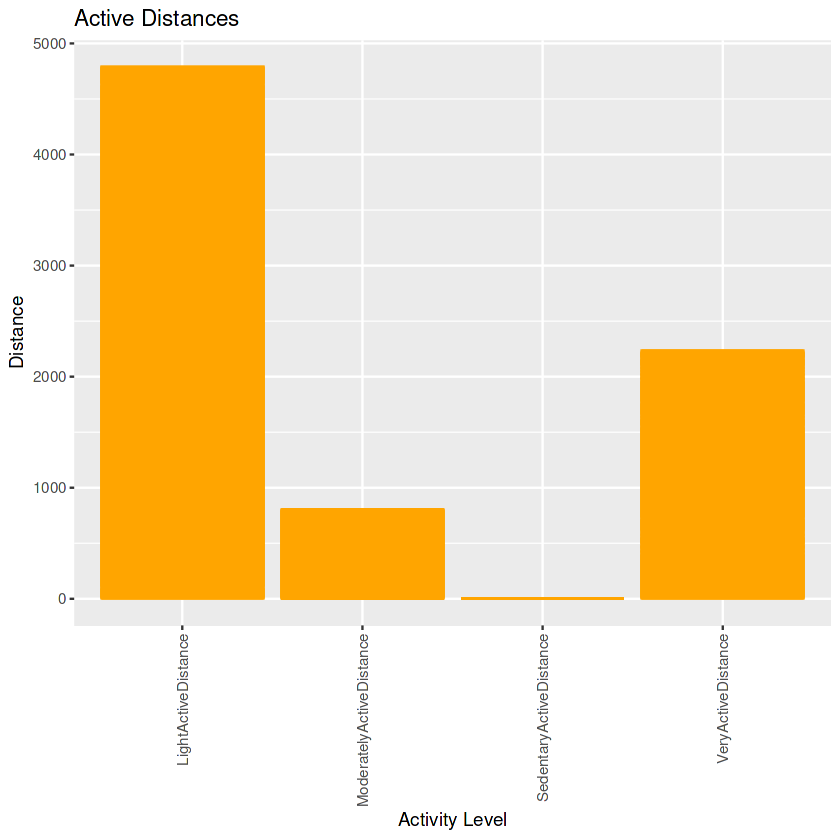

In [27]:
# This is combining the data into a longer format to allow the mulitple columns to be used in a table 

# Reshape the data into a longer format
ActivityD <- pivot_longer(bellabeat, 
                               cols = c(VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, 
                                        SedentaryActiveDistance),
                               names_to = "ActivityLevel", 
                               values_to = "Value")

# Create the bar plot
ggplot(ActivityD, aes(x = ActivityLevel, y = Value)) +
  geom_bar(stat = "identity", color = "orange", fill = "orange") +
  labs(x = "Activity Level", y = "Distance", title = "Active Distances") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

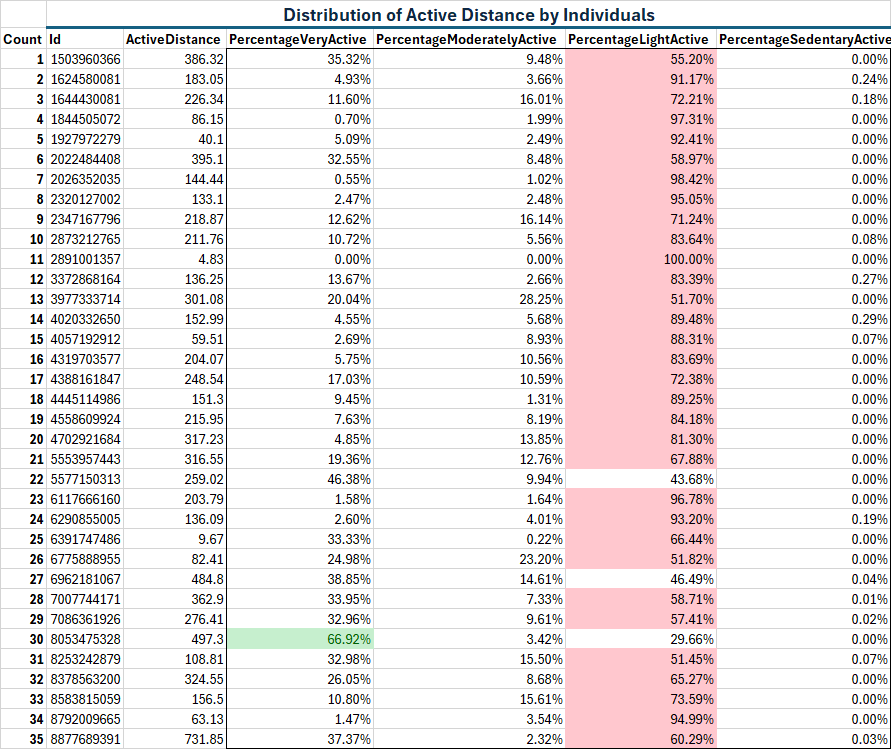

# Usage using Active Minutes (as Minutes)
The mean usage was 57.66% of the time of the 61-day sample period. 
PercentageOverallUsage column in the table below, highlights individuals in orange that are above or equal to the mean; 18 individuals or 51.43% of 35 users.

# Active Minutes 
In the table below, the users spent most of their time in SedentaryMinutes, highlighted in the red-to-white gradient, with some activity in LightActiveMinutes.


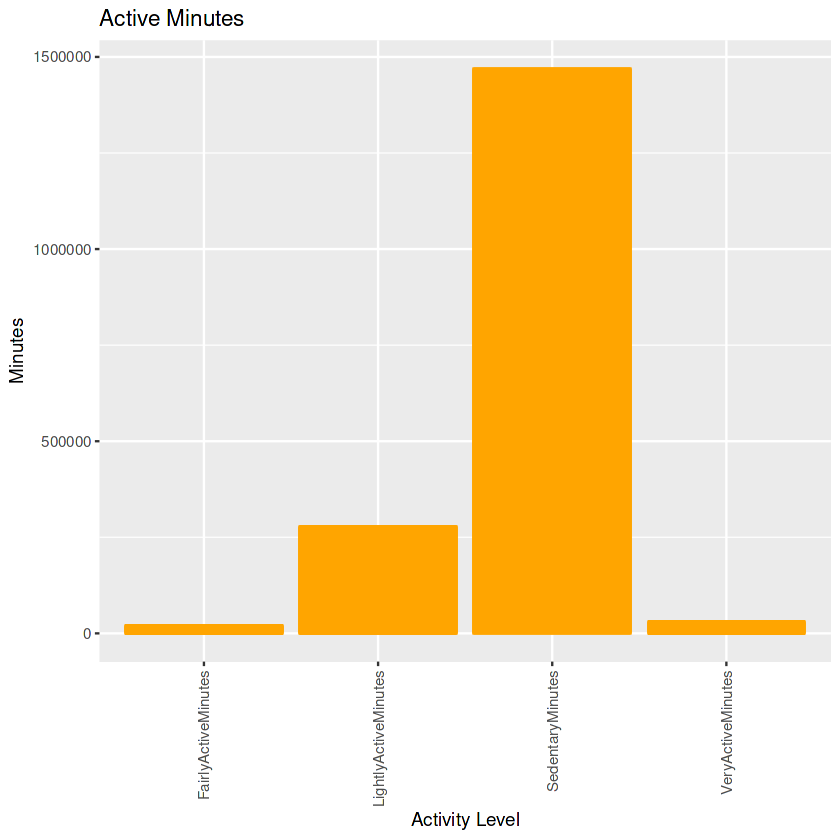

In [28]:
# Reshape the data into a longer format
ActivityM <- pivot_longer(bellabeat, 
                               cols = c(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes),
                               names_to = "ActivityLevel", 
                               values_to = "Value")

# Create the bar plot
ggplot(ActivityM, aes(x = ActivityLevel, y = Value)) +
  geom_bar(stat = "identity", color = "orange", fill = "orange") +
  labs(x = "Activity Level", y = "Minutes", title = "Active Minutes") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

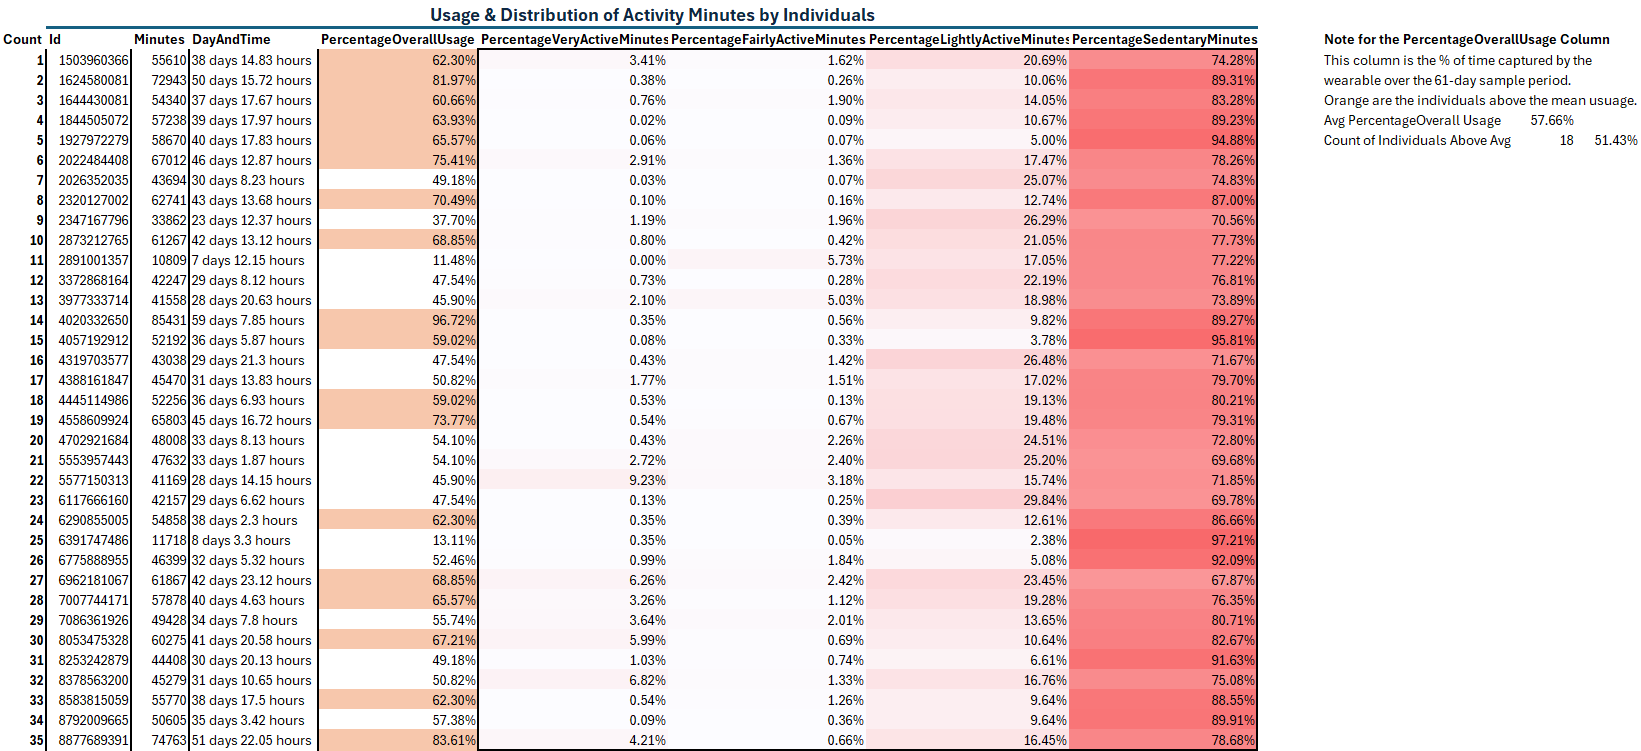

# Daily Activity - Tuesdays 

Based on a preliminary analysis into Date, Tuesday appeared as a high usage trend for Daily Activity data. To ensure the trend exists and is not a misleading graphical representation of a data point, for example, one person having a major gym day. Two summary tables were created after finding the frequency of Tuesdays in the Bellabeat dataset. Tuesday appears 9 times, with five other weekdays. (The weekdays have an even distribution except Friday at 8.) The first summary table summarizes the data by individual for every Tuesday. The second table shows an average of each individual’s data points for Tuesdays.

The tables were combined, and summary rows were added.  In the final table, “Distribution of Daily Activity Metrics on Tuesdays, “you can see the trend is true.  Overall, 31.2429% or 11 individuals were above average for each Tuesday metric. At the daily average level, 52% or 19 individuals were above the mean, demonstrating an even distribution of high-activity users.

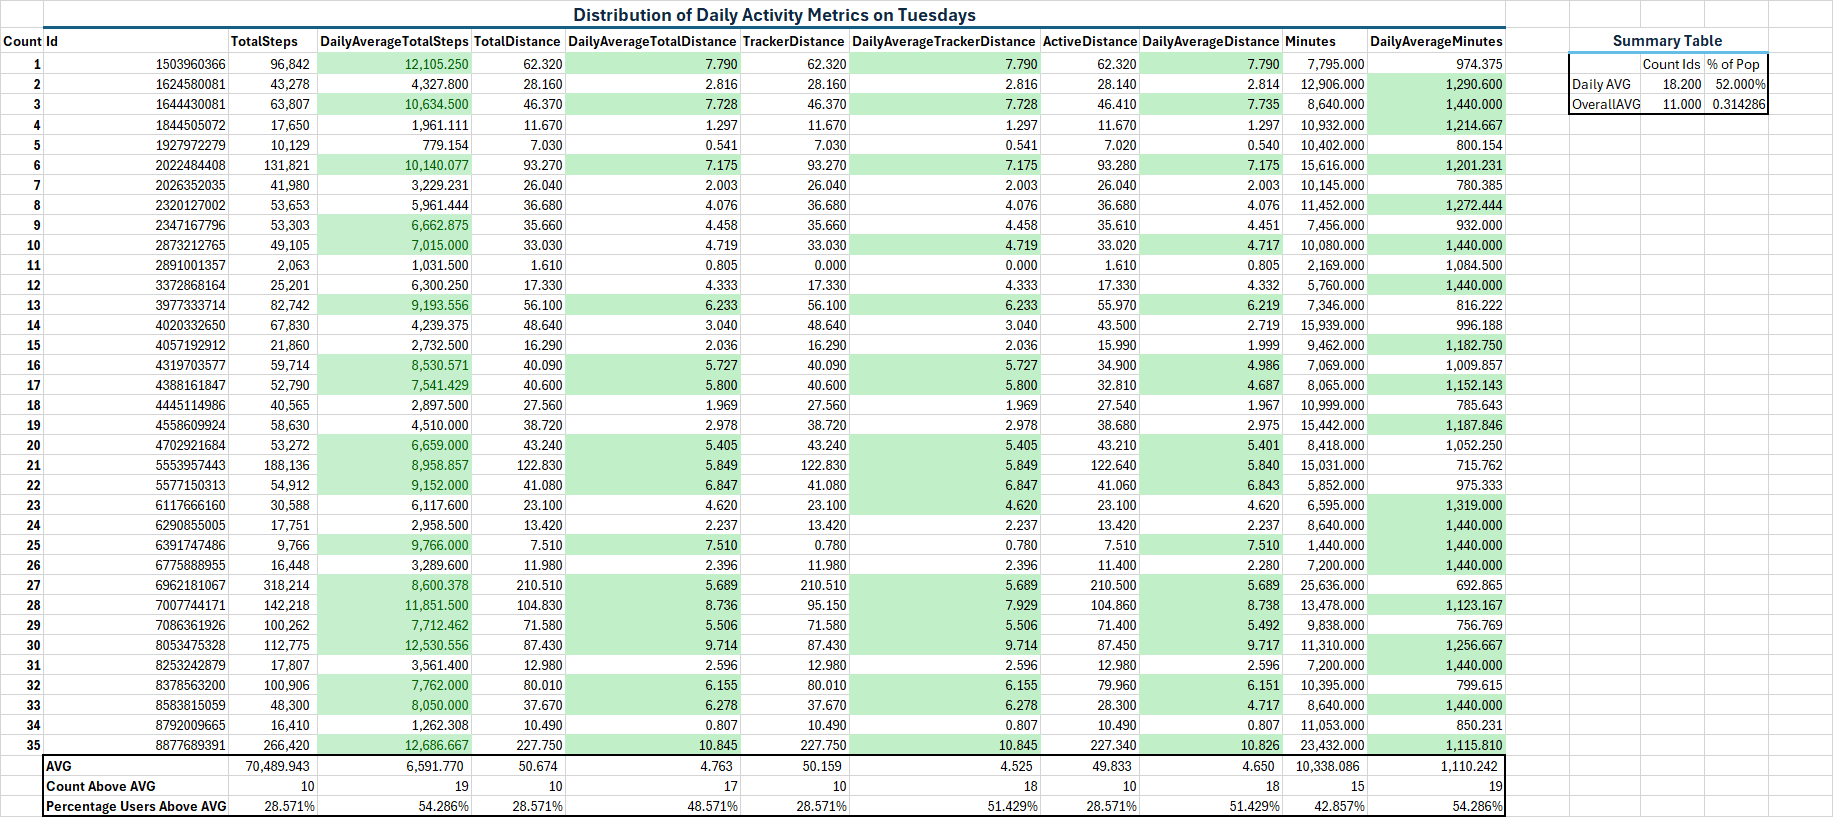

# Heart rate

Heart rate had less participation, with only 15 users taking advantage of the feature (42.857%). It also had no correlations to other data points.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  56.75   70.71   78.91   78.93   86.08  109.82     966 

geom_smooth: na.rm = FALSE, orientation = NA, se = TRUE
stat_smooth: na.rm = FALSE, orientation = NA, se = TRUE, fullrange = FALSE, level = 0.95, method = auto
position_identity 

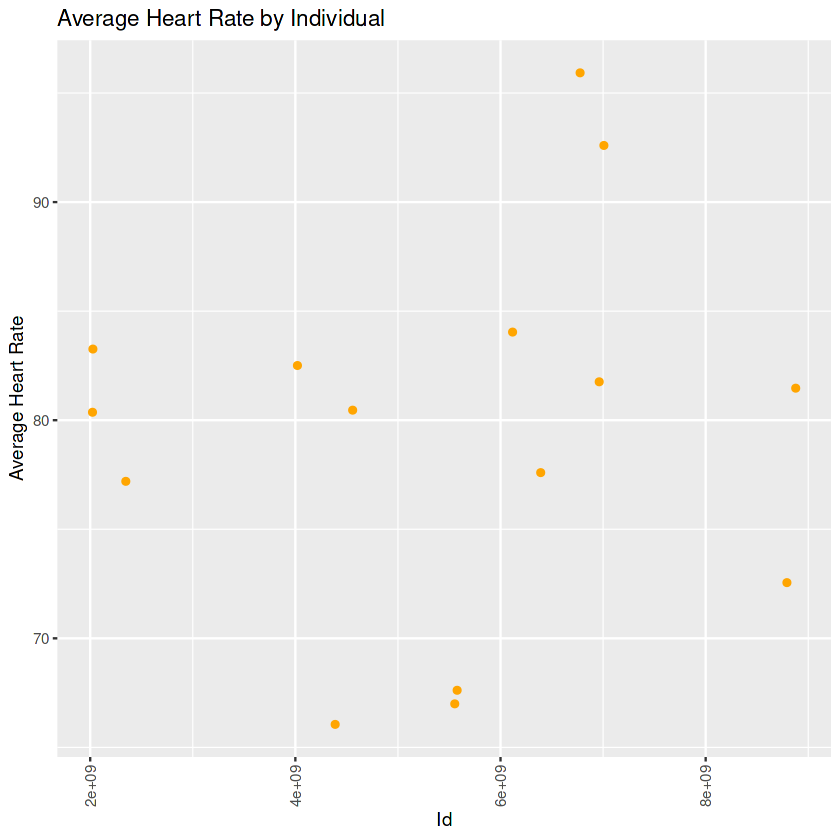

In [28]:
# Summary of column
summary(bellabeat$hrValue)

# Creating a variable of unique Calories by Id
average_hr <- aggregate(hrValue ~ Id, data = bellabeat, FUN = mean)

# Create a scatter plot looking for trends in average heart rate by individual (Id)
ggplot(average_hr, aes(x = Id, y = hrValue)) +
  geom_point(color = "orange") +
  labs(x = "Id", y = "Average Heart Rate", title = "Average Heart Rate by Individual") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
  geom_smooth(method="auto", se=TRUE, fullrange=FALSE, level=0.95)


# Weight
Also with low participation was Weight, with 13 individuals (37.142%). A correlation with BMI was anticipated but unseen, likely due to a lack of data. No correlations were found.
(BMI ia calculated using weight and height.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  116.0   136.0   137.8   158.1   188.3   294.3    1393 

Count of Unique Data Points in BMI, then Fat


[1] 13

Warning message:
“Removed 1393 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1533 rows containing missing values (`geom_point()`).”


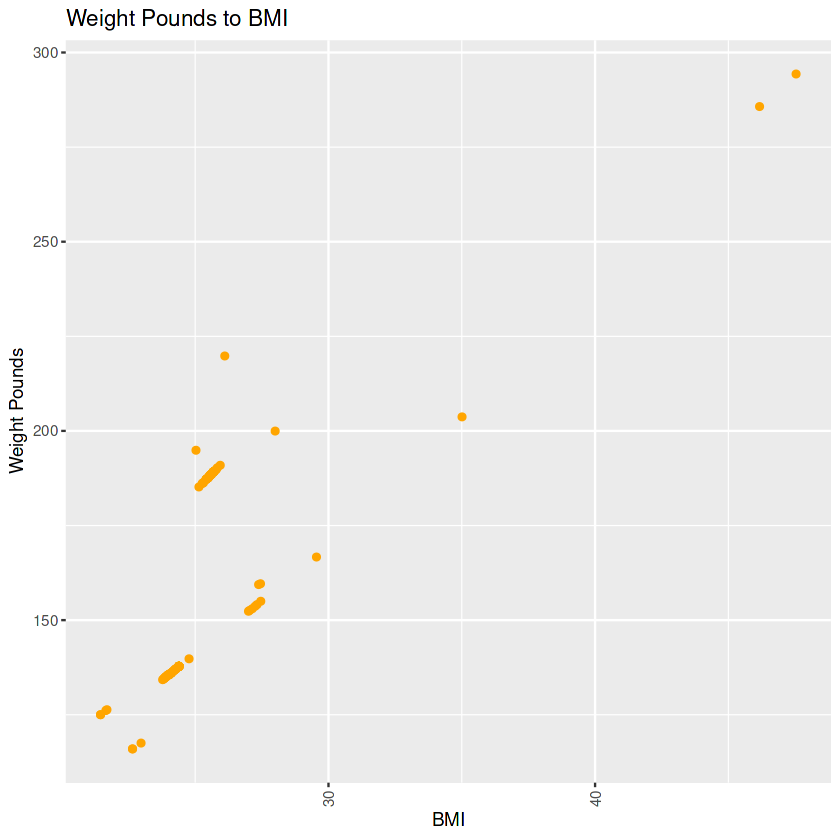

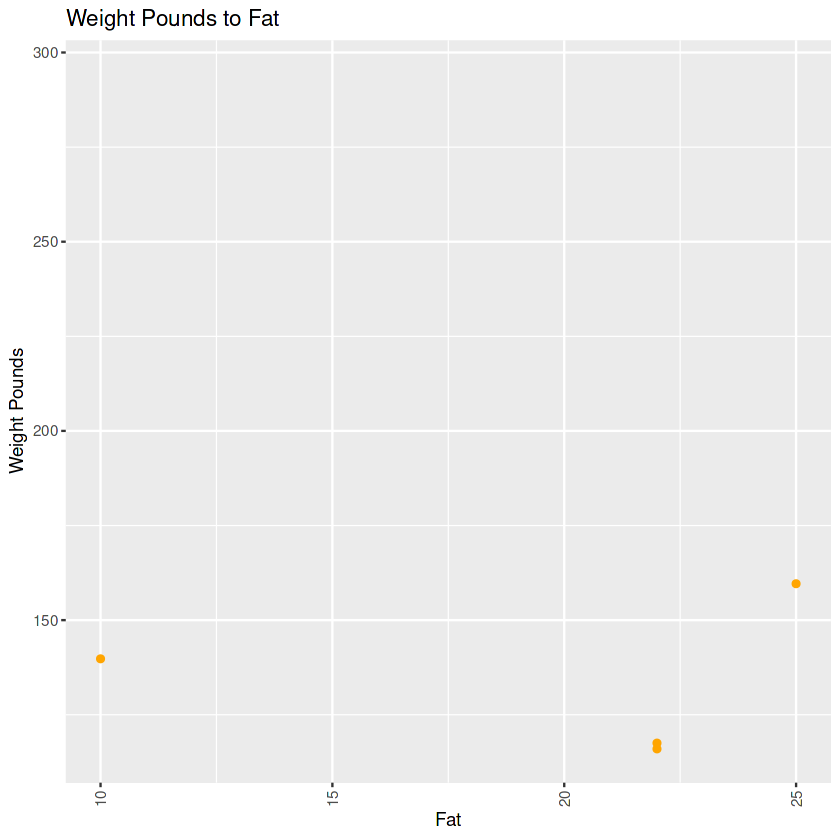

In [29]:
# Summary of column
summary(bellabeat$WeightPounds)
# n_distinct(bellabeat$BMI)

cat("Count of Unique Data Points in BMI, then Fat\n")  
BMI_counts <- table(bellabeat$Id, bellabeat$BMI)
fat_counts <- table(bellabeat$Id, bellabeat$Fat)

# Creating a variable of unique Calories by Id
 average_weight <- aggregate(WeightPounds ~ Id, data = bellabeat, FUN = mean)
 n_distinct(average_weight)

# Create a scatter plot of Weight in pounds against BMI, too few data points to see the relationship between BMI and weight
ggplot(bellabeat, aes(x = BMI, y = WeightPounds)) +
  geom_point(color = "orange")  +
  labs(x = "BMI", y = "Weight Pounds", title = "Weight Pounds to BMI") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Create a scatter plot of Weight in pounds against BMI, too few data points to see the relationship between BMI and weight
ggplot(bellabeat, aes(x = Fat, y = WeightPounds)) +
  geom_point(color = "orange")  +
  labs(x = "Fat", y = "Weight Pounds", title = "Weight Pounds to Fat") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Sleep

Sleep had a high participation of 25 users (71.428%); however, there were no correlations. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   1.045   1.065   1.095   1.097   2.252     793 

`geom_smooth()` using formula = 'y ~ x'


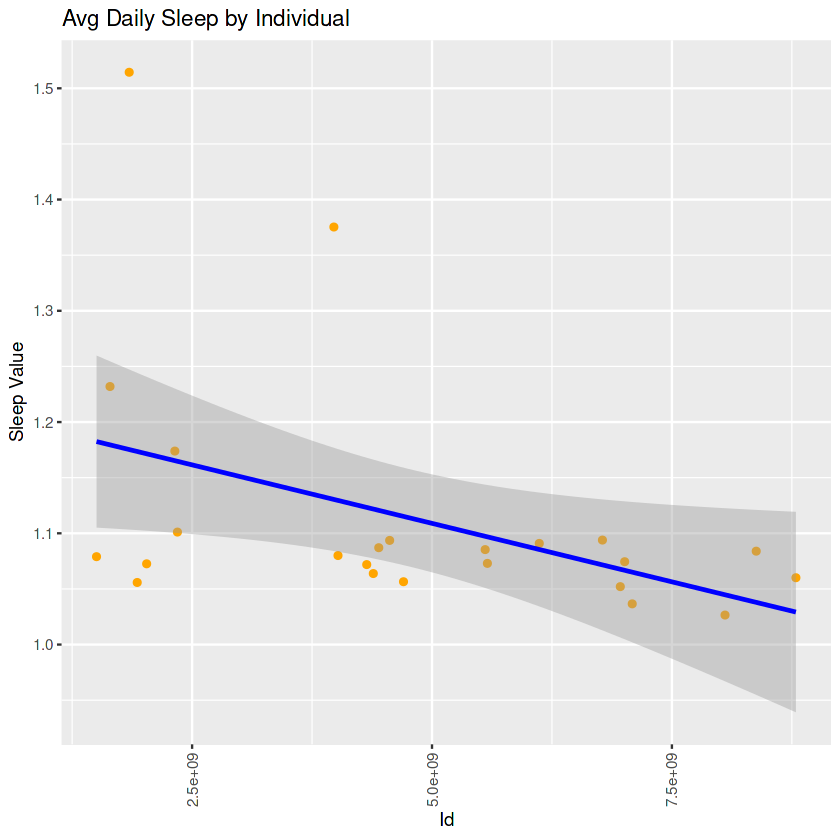

In [34]:
# Creating a variable of unique Calories by Id
average_s <- aggregate(sleepValue ~ Id, data = bellabeat, FUN = mean)

# Summary of column
summary(bellabeat$sleepValue)

# Creating a scatter plot
ggplot(average_s, aes(x = Id, y = sleepValue)) +
  geom_point(color = "orange") +
  geom_smooth(method = "lm", color = "blue") + # Adding the linear correlation line
  labs(x = "Id", y = "Sleep Value", title = "Avg Daily Sleep by Individual") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Understanding the Metric METs

## Summary of Research on METs
Metabolic equivalent (MET)
MET is a number that indicates the relative rate at which you burn calories during an activity. [Concordia University](https://www.concordia.ca/cunews/offices/provost/health/topics/physical-activity/measuring-activity.html#:~:text=More%20about%20METs,-The%20intensity%20of&text=One%20(1)%20MET%20is%20the,are%206.0%20METs%20or%20greater.)
METs range from about 0 to 10. They relate to heatrate.
[CDC on METs](https://www.cdc.gov/nccdphp/dnpa/physical/pdf/PA_Intensity_table_2_1.pdf)


# METs
METs had full participation but didn’t correlate with any other data points. 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   12.38   14.51   14.54   16.37   25.78      31 

[1] 1200

[1] 35

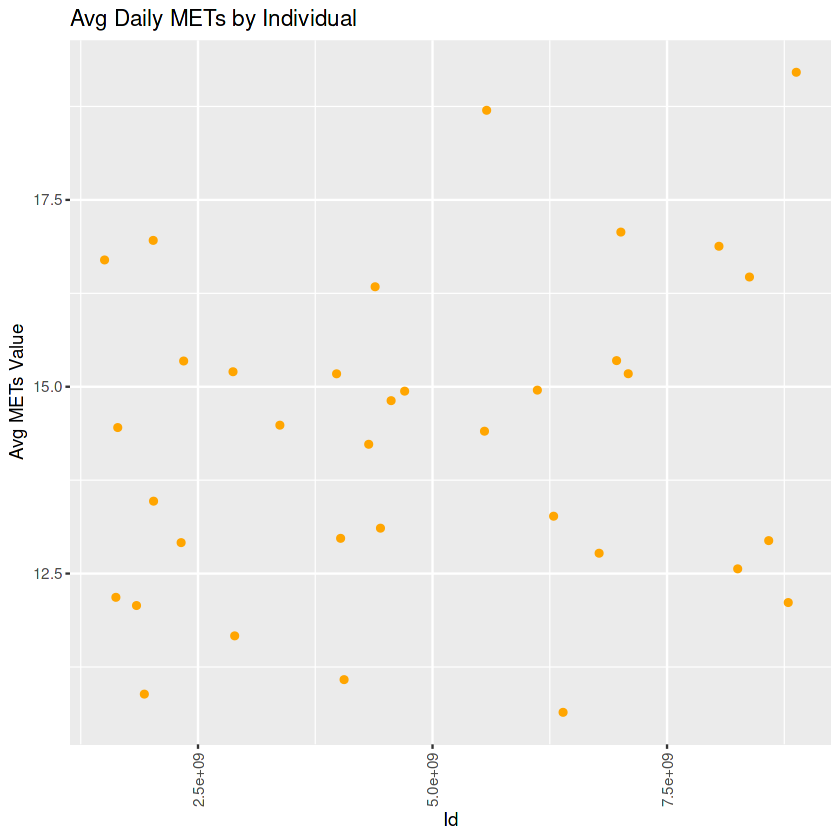

In [38]:
# Load the ggplot2 library
library(ggplot2)

# Trying to understand the range for METs as measured by the smart device. Using outside information for context.
summary(bellabeat$METs)

# Number of unique entries in the METs column 
unique_METs <- unique(bellabeat$METs)
length(unique_METs)

# Trying to find the number of individuals that made METs entries by counting unique entries of METs with Id
unique_ids_for_METs <- unique(bellabeat$Id[!duplicated(bellabeat$METs)])  # Get unique IDs for unique METs
length(unique_ids_for_METs)

# Create a histogram using ggplot2 of METs by user 
# Creating a variable of unique METs by Id
average_METs <- aggregate(METs ~ Id, data = bellabeat, FUN = mean)

# Creates a scattterplot
ggplot(average_METs, aes(x = Id, y = METs)) +
  geom_point(color = "orange") +
  labs(x = "Id", y = "Avg METs Value", title = "Avg Daily METs by Individual") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

# Summary of Analysis

* The data presented that DailyActivity, METs, and Sleep are the most popular features. 
* TotalSteps is the best predictor of the overall TotalDistance, TrackerDistance, ActiveDistance, and Calories burnt an individual will log. 
* Almost all users spent most of their time in Sedentary Minutes.
* There is a trend of increased DailyActivity on Tuesdays.


# Recommendations
1. Highlight features the customers have already high engagement in on marketing and product boxing. (DailyActivity, METs, and Sleep)

2. Consider push notifications or SMS digital marketing to the wearables on Tuesdays when there is increased activity. Targeting them as possible repeat customers or highlighting updates and new features. 

3. Users spend most of their time in SedentaryMinutes but most of their activity comes from steps. Create a way to promote active minutes or steps. Possibly create a campaign focusing on making your daily step goal with Bellabeat on your side.

**Other Recommendations**

Work with product development or create a survey to determine why there is less engagement with the heart rate and weight features.

Repeat the case study with a more representative sample size and more context into how METs, Sleep,  and Heartrate are calculated and cataloged.

